In [92]:
# df.to_pickle('dataset_lcforest_LOF10_bin30_th3_1km_noprior_ta.pkl')

In [2]:
from scripts.parallel_blocks import *
import pandas as pd

df = pd.read_pickle('dataset_lcforest_mahal22_bin15_th3_fancy1km_noprior_ta.pkl')

df.pg.mean()

6.0306700875070405

### This can be used to adjust dataframes with a new outlier method or regression method.

In [12]:
from scripts.parallel_blocks import *
import pandas as pd

df_ = pd.read_pickle('dataset_lcforest_LOF_bin15_th3_fancy1km_noprior_ta.pkl')

# Create a column to fill later
df_['outlier'] = np.nan

# Grouping keys
group_keys = ['camera','date','lat','lon']
i=0
# Iterate over each group
for keys, test_plot in df_.groupby(group_keys):
    i+=1
    test_plot = test_plot.copy()

    try:
        coefs, _, test = df_odr(test_plot, outlier_removal=0.22, w=[1, 0.25])

        # Ensure index alignment for merging
        test_plot['outlier'] = test['Outlier'].values

        # Set the values back in the original df using index
        df_.loc[test_plot.index, 'outlier'] = test_plot['outlier']

        indices_to_insert = [i for i in range(1,7) if i not in test['beam'].unique()]

        for index in indices_to_insert:
            coefs = np.insert(coefs, index, None)

        if np.all(np.isnan([coefs[1],coefs[3],coefs[5]])):
            y_strong = np.nan
        else:
            y_strong = np.nanmean([coefs[1],coefs[3],coefs[5]])
            y_strong_max = np.nanmax([coefs[1],coefs[3],coefs[5]])
            
        if np.all(np.isnan([coefs[2],coefs[4],coefs[6]])):
            y_weak = np.nan
        else:
            y_weak = np.nanmean([coefs[2],coefs[4],coefs[6]])
            y_weak_max = np.nanmax([coefs[2],coefs[4],coefs[6]])
            
        if np.any(np.isnan([y_strong, y_weak])):
            pv_ratio_mean = np.nan
            pv_ratio_max = np.nan
        else:
            pv_ratio_mean = y_strong/y_weak
            pv_ratio_max = y_strong_max/y_weak_max
        
        y_intercept_dict = {1: coefs[1], 2: coefs[2], 3: coefs[3], 4: coefs[4], 5: coefs[5], 6: coefs[6]}
        x_intercept_dict = {1: -coefs[1]/coefs[0], 2: -coefs[2]/coefs[0], 3: -coefs[3]/coefs[0], 4: -coefs[4]/coefs[0],
                           5: -coefs[5]/coefs[0], 6: -coefs[6]/coefs[0]}

        df_.loc[test_plot.index,'pvpg'] = -coefs[0]
        df_.loc[test_plot.index,'pv'] = test_plot['beam'].map(y_intercept_dict)
        df_.loc[test_plot.index,'pg'] = test_plot['beam'].map(x_intercept_dict)
        df_.loc[test_plot.index,'pv_ratio_max'] = pv_ratio_max
        df_.loc[test_plot.index,'pv_ratio_mean'] = pv_ratio_mean

    except Exception as e:
        print(f"Skipping group {keys} due to error: {e}")
        continue

    # print(params)
    # print(test_plot)
    # print(test)

# All 18 Sites!

In [19]:
data[(data['FSC'] > 0) & (data['FSC'] < 1)]

,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,Eg_weak,...,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,fsc_category
200,delta_junction,30/04/2022,63.867586,-145.787644,0.344281,1.625753,4.722165,3.076564,0.470588,0.933333,...,0.95,0.0,0.000000,19.0,0.0,1.821124,1.821124,1.0,Ground Snow,Between 0 and 1
203,delta_junction,30/04/2022,63.894614,-145.794326,0.541602,2.190381,4.044266,2.151261,0.909627,0.571429,...,0.95,0.0,0.532258,19.0,0.0,1.957856,1.957856,1.0,Ground Snow,Between 0 and 1
267,glees,28/05/2023,41.359895,-106.214109,0.627306,2.504540,3.992535,1.829762,1.414286,0.555556,...,0.96,0.0,0.000000,19.0,0.0,2.066404,2.066404,1.0,Ground Snow,Between 0 and 1
533,kenttarova,25/05/2020,67.955751,24.208633,0.246409,1.627780,6.606019,3.190476,0.785714,0.500000,...,0.99,0.0,0.000000,9.0,0.0,1.546644,1.546644,1.0,Ground Snow,Between 0 and 1
534,kenttarova,25/05/2020,67.964760,24.211748,0.234296,1.810812,7.728741,3.166667,0.828571,0.547917,...,0.99,0.0,0.000000,9.0,0.0,1.632391,1.632391,1.0,Ground Snow,Between 0 and 1
535,kenttarova,25/05/2020,67.973769,24.214672,0.381058,1.871356,4.910947,3.095238,0.750000,0.933333,...,0.99,0.0,0.000000,9.0,0.0,2.117518,2.117518,1.0,Ground Snow,Between 0 and 1
536,kenttarova,25/05/2020,67.982778,24.217766,0.286985,1.719973,5.993251,2.388095,1.025000,0.818182,...,0.99,0.0,0.000000,9.0,0.0,1.898168,1.898168,1.0,Ground Snow,Between 0 and 1
537,kenttarova,25/05/2020,67.991788,24.220725,0.497106,2.498636,5.026362,3.166667,0.651515,0.732143,...,0.99,0.0,0.000000,9.0,0.0,2.035337,2.035337,1.0,Ground Snow,Between 0 and 1
538,kenttarova,25/05/2020,68.000797,24.223756,0.108291,0.905596,8.362647,3.952381,0.476190,1.083333,...,0.99,0.0,0.000000,9.0,0.0,2.125269,2.125269,1.0,Ground Snow,Between 0 and 1
540,kenttarova,25/05/2020,68.018815,24.151378,0.198234,1.229721,6.203377,2.823529,0.619195,0.541958,...,0.99,0.0,0.000000,9.0,0.0,1.256914,1.256914,1.0,Ground Snow,Between 0 and 1


1822
494


/tmp/ipykernel_982871/1143569194.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


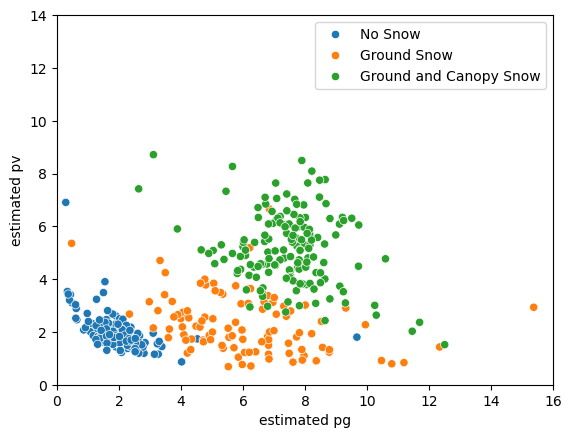

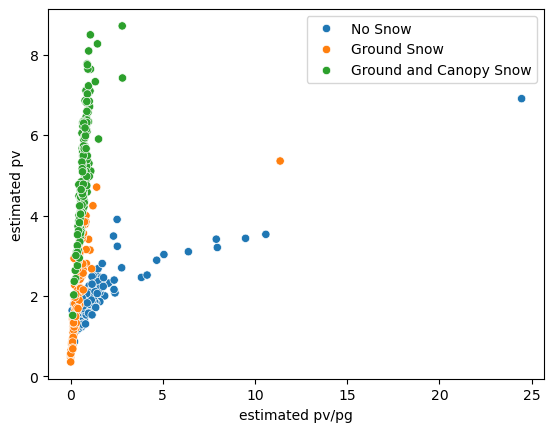

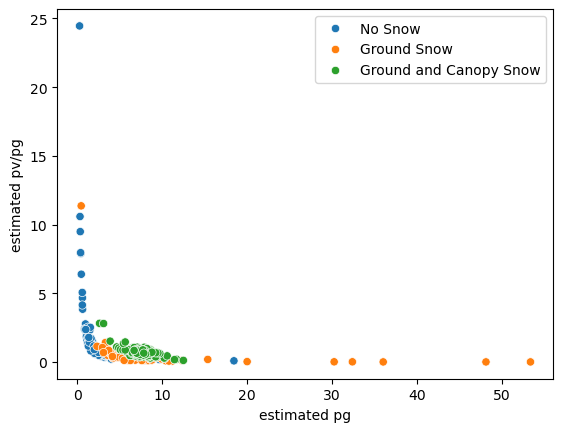

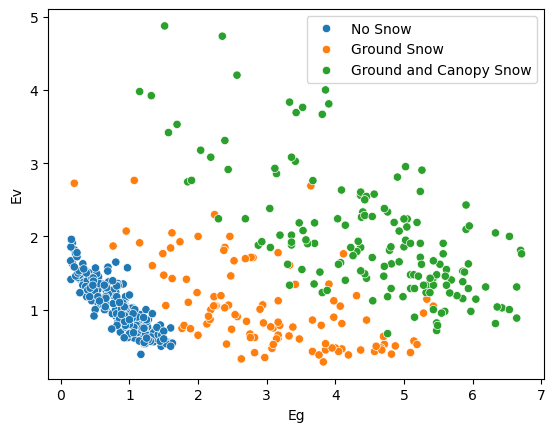

In [8]:
from scripts.imports import *

df = pd.read_pickle('dataset_lcforest_LOF_bin15_th3_fancy1km_noprior_ta_reclassified_v2.pkl')
# df = pd.read_pickle('dataset_lcforest_LOF_bin15_th3_fancy750m_noprior_ta.pkl')

# df = df_.copy()
# print(df)
# mask = df['beam'] == 3
# df.loc[mask, ['pv','pg','Ev','Eg']] /= 0.85

# First create masked columns
df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier'] == 1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier'] == 1), df['Ev'], np.nan)
df['Eg_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Eg'], np.nan)
df['Ev_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'Eg_weak': 'median',
    'Ev_weak': 'median',
    'data_quantity': 'max',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
df_grouped = df_grouped[df_grouped['Eg_strong']>=0]
print(len(df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))]))
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    &((df_grouped['TreeSnow'] <= 0.05)|(df_grouped['TreeSnow'] >= 0.95))
    &(df_grouped['Eg_strong'] <= 16)&(df_grouped['Ev_strong'] <= 16)#&(df_grouped['pvpg'] <= 7.5)
    # &(df_grouped['pv_ratio_mean'] >= 1.2)
    &(df_grouped['Eg_strong']/df_grouped['Eg_weak'] >= 1.1)#&(df_grouped['Ev_strong']/df_grouped['Ev_weak'] >= 1.1)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 27)]
data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.round(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})
print(len(data))

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv')
plt.xlim(0,16)
plt.ylim(0,14)
# plt.plot([4.2,0],[0,9],'r--') #LOF10_bin20_DW 570 points
# plt.plot([5,0],[0,7.5],'r--') #LOF10_bin30_DW 596 points
                                #LOF10_bin20 578 points
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pv/pg')
plt.ylabel('estimated pv')
# plt.xlim(0,3)
# plt.ylim(0,12)
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='pg', y='pvpg', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv/pg')
# plt.xlim(0,20)
# plt.ylim(0,20)
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = data.sort_values('JointSnow'), x='Eg_strong', y='Ev_strong', hue='Conditions')#, size='data_quantity')
plt.xlabel('Eg')
plt.ylabel('Ev')
# plt.xlim(0,20)
# plt.ylim(0,20)
# plt.plot([2.5,0],[0,2.5],'r--') #LOF10_bin20 570 points
# plt.plot([2.5,0],[0,2.5],'r--') #LOF10_bin30 596 points
plt.legend(loc='best')
plt.show()

In [2]:
df.info(), df_grouped.info(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87167 entries, 0 to 87166
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   camera             87167 non-null  object 
 1   date               87167 non-null  object 
 2   lon                87167 non-null  float64
 3   lat                87167 non-null  float64
 4   pvpg               87167 non-null  float64
 5   pv                 87167 non-null  float64
 6   pg                 87167 non-null  float64
 7   Eg                 87167 non-null  float64
 8   Ev                 87167 non-null  float64
 9   data_quantity      87167 non-null  int64  
 10  data_quality       87167 non-null  int64  
 11  altitude           87167 non-null  int64  
 12  pv_ratio_mean      75590 non-null  float64
 13  pv_ratio_max       75590 non-null  float64
 14  trad_cc            87167 non-null  float64
 15  beam               87167 non-null  int64  
 16  beam_str           871

(None, None, None)

#### Logistic Regression

/tmp/ipykernel_126133/1195782110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JointSnowRounded'] = data['JointSnow'].round().astype(int)
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warnin

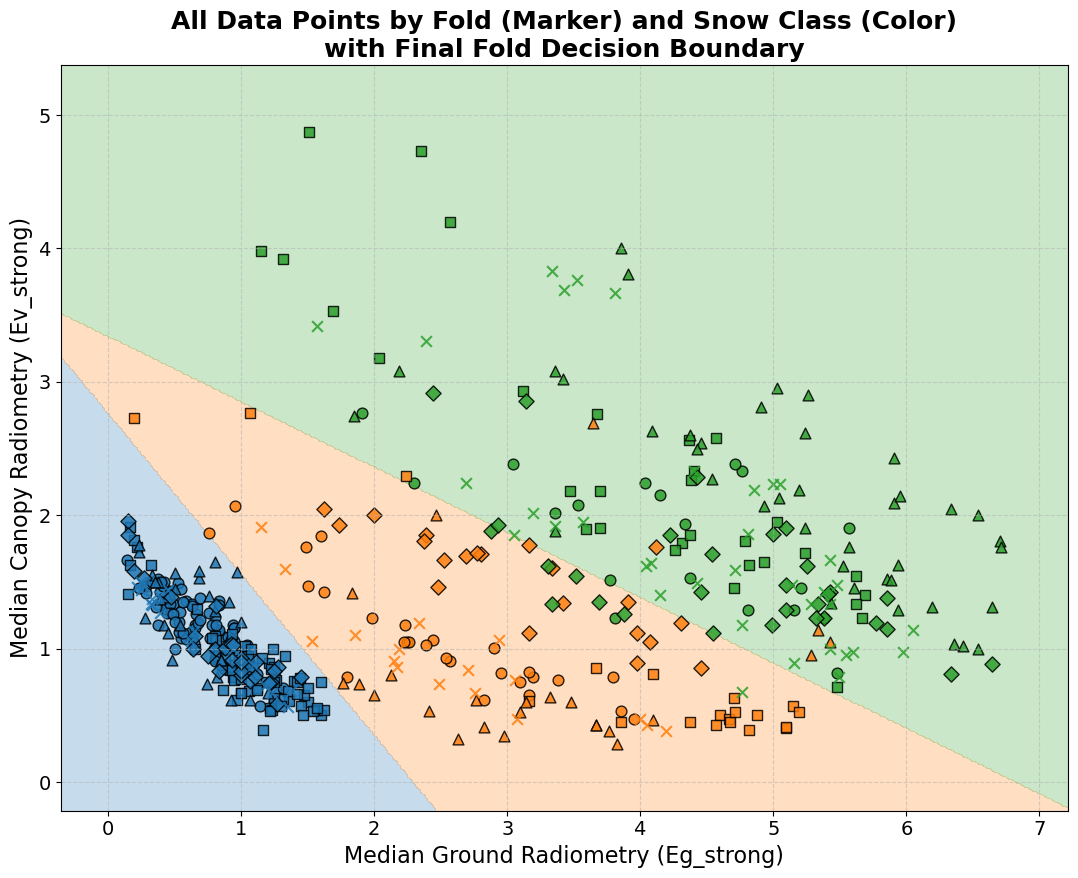

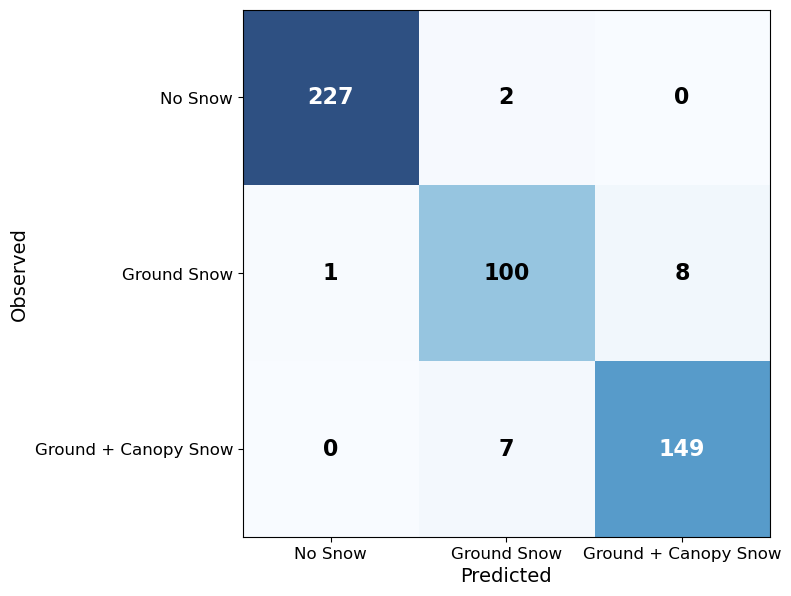

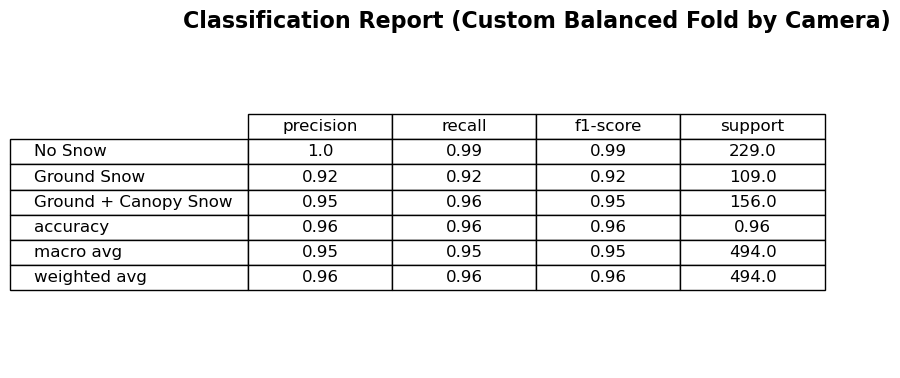

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- Prepare Data ---
data['JointSnowRounded'] = data['JointSnow'].round().astype(int)
features = ['Eg_strong', 'Ev_strong']
target = 'JointSnowRounded'

X = data[features].values
y = data[target].values

# --- Create Custom Balanced GroupKFold on "camera" ---
n_splits = 5
camera_counts = data['camera'].value_counts()
sorted_cameras = camera_counts.index.tolist()

# Assign each camera to a fold in round-robin fashion
camera_to_fold = {}
for i, cam in enumerate(sorted_cameras):
    camera_to_fold[cam] = i % n_splits

# Assign fold index to each row
group_indices = data['camera'].map(camera_to_fold).values

# Prepare containers
labels_str = ['No Snow', 'Ground Snow', 'Ground + Canopy Snow']
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
group_markers = ['o', 's', '^', 'D', 'x']  # Marker per fold

all_y_true = []
all_y_pred = []
final_model = None
final_test_idx = None

# --- Cross-validation using custom folds ---
for fold_idx in range(n_splits):
    test_idx = np.where(group_indices == fold_idx)[0]
    train_idx = np.where(group_indices != fold_idx)[0]

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                               max_iter=1000, random_state=42, penalty=None)
    model.fit(X[train_idx], y[train_idx])
    y_pred = model.predict(X[test_idx])

    all_y_true.extend(y[test_idx])
    all_y_pred.extend(y_pred)

    if fold_idx == n_splits - 1:
        final_model = model
        final_test_idx = test_idx

# --- Decision Boundary Plot (Final fold only) ---
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = final_model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(11, 9))
plt.rcParams.update({'font.size': 14})

# Decision boundary background
plt.contourf(xx, yy, Z, alpha=0.25, levels=[-0.5, 0.5, 1.5, 2.5], colors=class_colors)

# Overlay all data points colored by class, styled by fold
for fold in range(n_splits):
    for cls in [0, 1, 2]:
        mask = (group_indices == fold) & (y == cls)
        plt.scatter(X[mask, 0], X[mask, 1],
                    color=class_colors[cls], marker=group_markers[fold],
                    edgecolor='k', s=60, alpha=0.85,
                    label=f'{labels_str[cls]} (Fold {fold+1})')

# Avoid duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
seen = set()
unique = [(h, l) for h, l in zip(handles, labels) if not (l in seen or seen.add(l))]
# plt.legend(*zip(*unique), fontsize=11, ncol=2)

plt.xlabel('Median Ground Radiometry (Eg_strong)', fontsize=16)
plt.ylabel('Median Canopy Radiometry (Ev_strong)', fontsize=16)
plt.title('All Data Points by Fold (Marker) and Snow Class (Color)\nwith Final Fold Decision Boundary', fontsize=18, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Confusion Matrix (All folds) ---
cm = confusion_matrix(all_y_true, all_y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, cmap='Blues', alpha=0.85)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=16, fontweight='bold',
                color='white' if cm[i, j] > cm.max()/2 else 'black')

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(labels_str, fontsize=12)
ax.set_yticklabels(labels_str, fontsize=12)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Observed', fontsize=14)
plt.tight_layout()
plt.show()

# --- Classification Report (All folds) ---
report_dict = classification_report(all_y_true, all_y_pred,
                                    target_names=labels_str, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(2)

fig, ax = plt.subplots(figsize=(9, 4))
ax.axis('off')
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.4)
plt.title('Classification Report (Custom Balanced Fold by Camera)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# Plotting ATL08 from the Dataframe

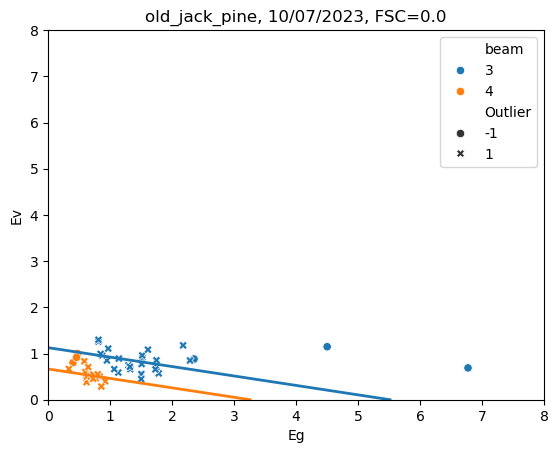

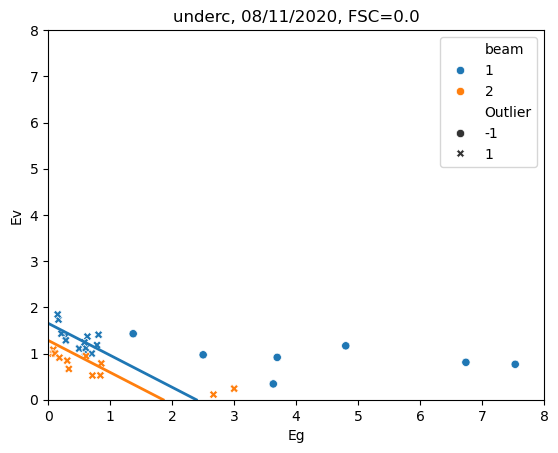

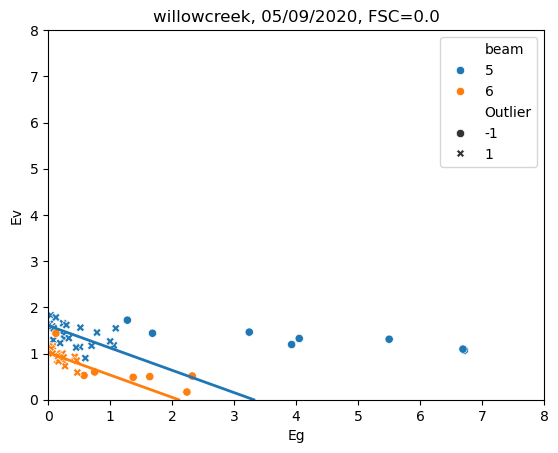

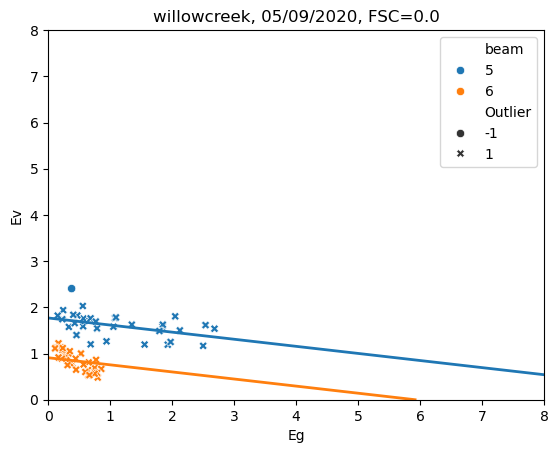

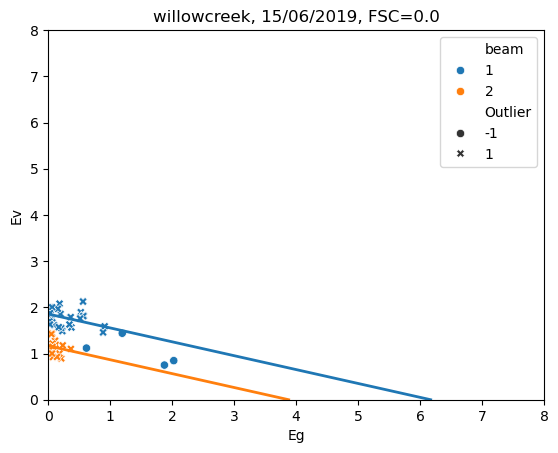

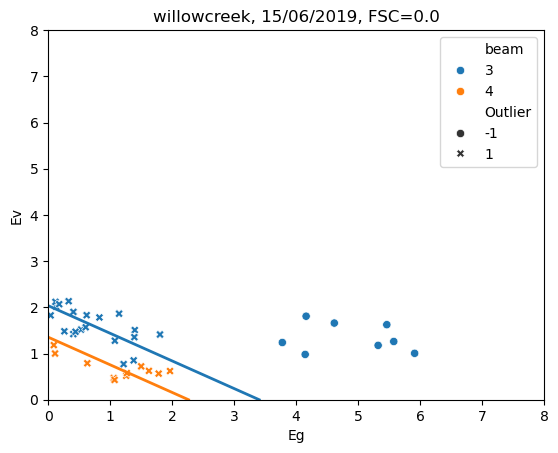

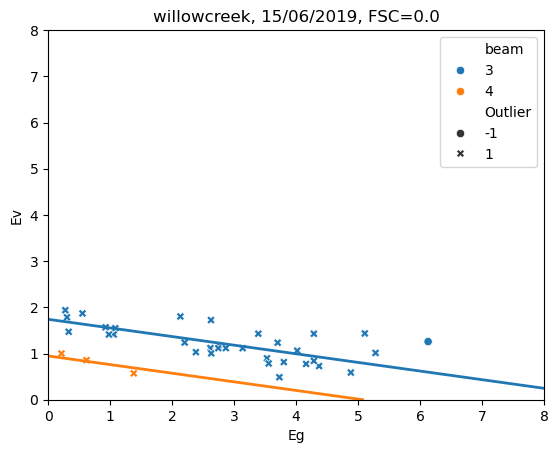

In [11]:
from scripts.parallel_blocks import *
    
# misclassified.columns
for idx, row in misclassified.iterrows():
    if row['FSC'] <= 0.05:
        plt.figure()
        plt.title(f"{row['camera']}, {row['date']}, FSC={row['FSC']}")
        
        test_plot = df[(df['camera'] == row['camera']) &
                       (df['date'] == row['date']) &
                       (df['lon'] == row['lon']) &
                       (df['lat'] == row['lat'])].copy()

        params, _, test = df_odr(test_plot, outlier_removal=10,w=[1, 0.25])

        # print(test)

        # Get sorted unique beams (hue order used by seaborn)
        beam_order = sorted(test['beam'].unique())

        # Create mapping from beam label to tab10 color
        tab10 = cm.get_cmap('tab10')
        color_map = {beam: tab10(i) for i, beam in enumerate(beam_order)}

        # Plot with fixed hue order and palette
        sns.scatterplot(data=test, x='Eg', y='Ev', hue='beam', style='Outlier',
                        hue_order=beam_order, palette=color_map)

        # Plot ODR lines in matching colors
        for b, beam in zip(params[1:], beam_order):
            plt.plot([0, -b / params[0]], [b, 0], color=color_map[beam], linewidth=2)

        plt.xlim(0, 8)
        plt.ylim(0, 8)
        plt.legend()
        plt.show()

        # break

# Fractional

536


/tmp/ipykernel_982871/282957625.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frac_data['JointSnowBinary'] = frac_data['JointSnow'].apply(lambda x: 1 if x >= 1 else x)


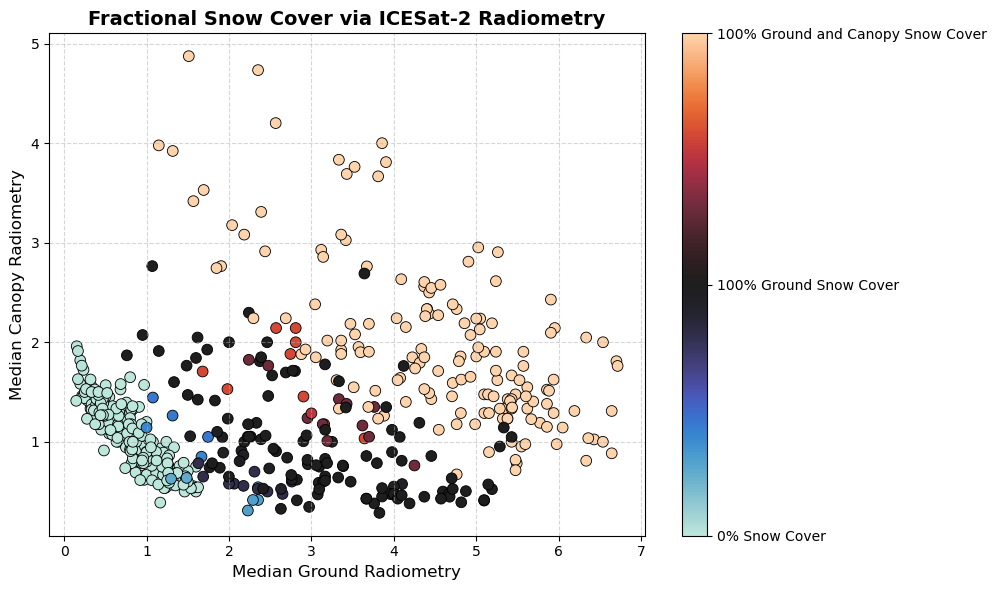

In [18]:
from scripts.imports import *

df = pd.read_pickle('dataset_lcforest_LOF_bin15_th3_fancy1km_noprior_ta_reclassified_v2.pkl')
# print(df.columns)

df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Ev'], np.nan)
df['Eg_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Eg'], np.nan)
df['Ev_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'Eg_weak': 'median',
    'Ev_weak': 'median',
    'data_quantity': 'max',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
df_grouped = df_grouped[df_grouped['Eg_strong']>=0]
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
frac_data = df_grouped[((df_grouped['FSC'] >= 0.00)&(df_grouped['FSC'] <= 1.00))
    &(df_grouped['Eg_strong'] <= 16)&(df_grouped['Ev_strong'] <= 16)#&(df_grouped['pvpg'] <= 7.5)
    # &(df_grouped['pv_ratio_mean'] >= 1.2)
    &(df_grouped['Eg_strong']/df_grouped['Eg_weak'] >= 1.2)#&(df_grouped['Ev_strong']/df_grouped['Ev_weak'] >= 1.1)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 27)]
frac_data['JointSnowBinary'] = frac_data['JointSnow'].apply(lambda x: 1 if x >= 1 else x)
print(len(frac_data))

plt.figure(figsize=(10, 6))
ax = plt.gca()
scatter = sns.scatterplot(
    data=frac_data.sort_values('FSC'),
    x='Eg_strong', y='Ev_strong',
    hue='JointSnow', palette='icefire', edgecolor='black', s=60, ax=ax, legend=False
)

# Add manual colorbar
norm = plt.Normalize(0, 2)
sm = plt.cm.ScalarMappable(cmap='icefire', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Snow Cover Category', fontsize=12)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['0% Snow Cover', '100% Ground Snow Cover', '100% Ground and Canopy Snow Cover'])

# Set axes and title
plt.xlabel('Median Ground Radiometry', fontsize=12)
plt.ylabel('Median Canopy Radiometry', fontsize=12)
plt.title('Fractional Snow Cover via ICESat-2 Radiometry', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('poster_reclassified_FSC_icefire.svg')
plt.show()


/tmp/ipykernel_982871/2894421469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frac_data['Partial Snow'] = frac_data['FSC'].apply(lambda x: 'No' if x in [0, 1] else 'Yes')


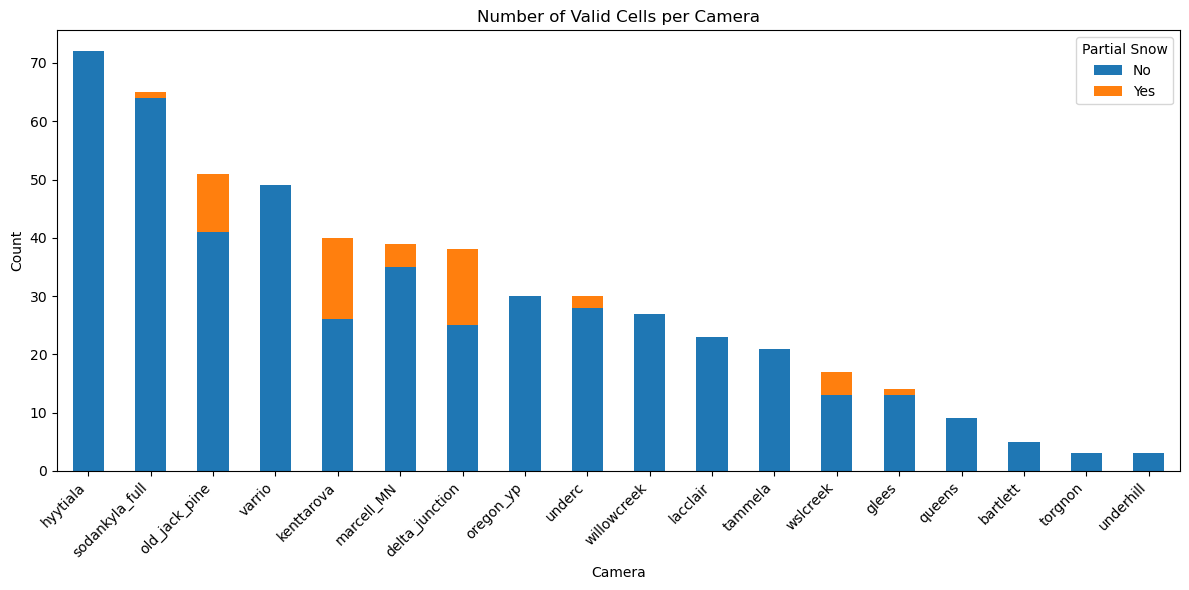

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Categorize FSC values
frac_data['Partial Snow'] = frac_data['FSC'].apply(lambda x: 'No' if x in [0, 1] else 'Yes')

# Count occurrences per camera per FSC category
counts = frac_data.groupby(['camera', 'Partial Snow']).size().unstack(fill_value=0)

# Sort cameras by total count
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Plot
counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Camera')
plt.ylabel('Count')
plt.title('Number of Valid Cells per Camera')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_255095/1926942353.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frac_data['JointSnowBinary'] = frac_data['JointSnow'].apply(lambda x: 1 if x >= 1 else x)


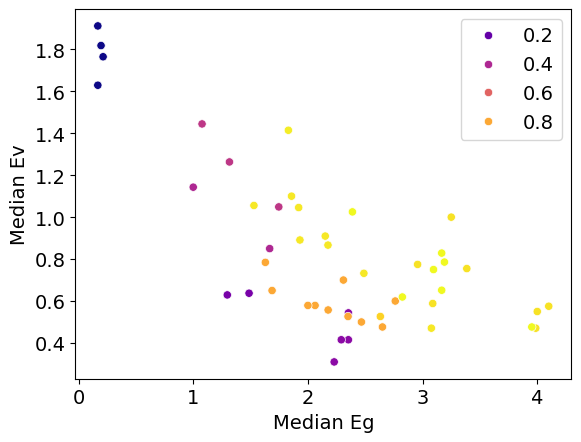

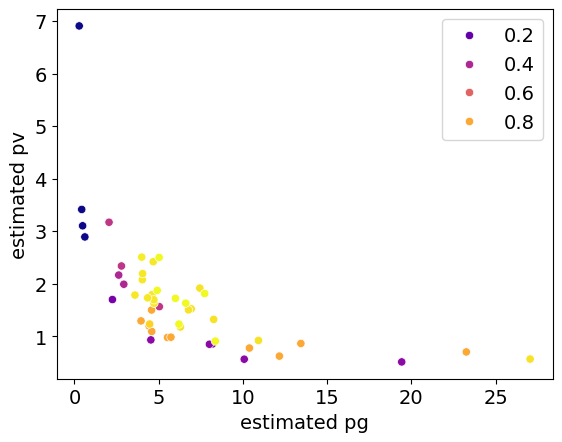

49


,camera,date,lat,lon,pvpg,pv,pg,Eg_strong,Ev_strong,Eg_weak,...,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,JointSnowBinary
71,delta_junction,02/05/2021,63.867586,-145.769149,0.105647,0.846117,8.008945,2.352941,0.543344,0.944444,...,0.866235,0.30,0.0,0.000000,16.0,0.0,1.613743,1.613743,0.30,0.30
203,delta_junction,30/04/2022,63.894614,-145.794326,0.541602,2.190381,4.044266,2.151261,0.909627,0.571429,...,101.161815,0.95,0.0,0.532258,19.0,0.0,1.957856,1.957856,0.95,0.95
202,delta_junction,30/04/2022,63.885605,-145.792315,0.388734,1.790463,4.605884,1.919505,1.045752,0.750000,...,104.583208,0.95,0.0,0.405660,19.0,0.0,1.847011,1.847011,0.95,0.95
201,delta_junction,30/04/2022,63.876595,-145.789911,0.514998,2.074235,4.027656,1.930341,0.891003,0.857143,...,103.866039,0.95,0.0,0.049505,19.0,0.0,2.114363,2.114363,0.95,0.95
158,delta_junction,26/04/2024,63.876595,-145.756934,0.752970,1.696849,2.253542,1.486842,0.637218,0.436508,...,0.303764,0.25,0.0,0.000000,32.0,0.0,1.380338,1.380338,0.25,0.25
152,delta_junction,26/04/2024,63.849568,-145.750302,0.103964,0.851402,8.189417,1.297059,0.629085,0.200000,...,0.270098,0.25,0.0,0.000000,32.0,0.0,1.026356,1.026356,0.25,0.25
200,delta_junction,30/04/2022,63.867586,-145.787644,0.344281,1.625753,4.722165,3.076564,0.470588,0.933333,...,104.484682,0.95,0.0,0.000000,19.0,0.0,1.821124,1.821124,0.95,0.95
83,delta_junction,03/05/2020,63.885605,-145.807932,0.837430,2.335950,2.789429,1.315789,1.263158,0.125000,...,0.273962,0.45,0.0,0.000000,8.0,0.0,1.775302,1.775302,0.45,0.45
81,delta_junction,03/05/2020,63.876595,-145.805841,1.543325,3.168583,2.053089,1.076923,1.444444,0.400000,...,0.252075,0.45,0.0,0.000000,8.0,0.0,1.895639,1.895639,0.45,0.45
74,delta_junction,02/05/2021,63.894614,-145.775152,0.026234,0.509452,19.419462,2.352941,0.415225,1.000000,...,0.666928,0.30,0.0,0.048387,16.0,0.0,1.196245,1.196245,0.30,0.30


In [26]:
from scripts.imports import *

df = pd.read_pickle('dataset_lcforest_LOF_bin15_th3_fancy1km_noprior_ta_reclassified.pkl')
# print(df.columns)

df['Eg_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Eg'], np.nan)
df['Ev_strong'] = np.where((df['beam_str'] == 'strong')&(df['outlier']==1), df['Ev'], np.nan)
df['Eg_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Eg'], np.nan)
df['Ev_weak'] = np.where((df['beam_str'] == 'weak')&(df['outlier'] == 1), df['Ev'], np.nan)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg_strong': 'median',
    'Ev_strong': 'median',
    'Eg_weak': 'median',
    'Ev_weak': 'median',
    'data_quantity': 'max',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()
df_grouped = df_grouped[df_grouped['Eg_strong']>=0]
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
frac_data = df_grouped[((df_grouped['FSC'] > 0.00)&(df_grouped['FSC'] < 1.00))
    &(df_grouped['Eg_strong'] <= 16)&(df_grouped['Ev_strong'] <= 16)#&(df_grouped['pvpg'] <= 7.5)
    # &(df_grouped['pv_ratio_mean'] >= 1.2)
    &(df_grouped['Eg_strong']/df_grouped['Eg_weak'] >= 1.2)#&(df_grouped['Ev_strong']/df_grouped['Ev_weak'] >= 1.1)
    &((df_grouped['layer_flag'] <= .7)&(df_grouped['msw_flag'] < 0.2))&(df_grouped['data_quantity'] >= 27)]
frac_data['JointSnowBinary'] = frac_data['JointSnow'].apply(lambda x: 1 if x >= 1 else x)

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='Eg_strong', y='Ev_strong', hue='JointSnow', palette='plasma')
plt.xlabel('Median Eg')
plt.ylabel('Median Ev')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

plt.figure()
sns.scatterplot(data = frac_data.sort_values('FSC'), x='pg', y='pv', hue='JointSnow', palette='plasma')#, size='data_quantity')
plt.xlabel('estimated pg')
plt.ylabel('estimated pv')
# plt.xlim(0,16)
# plt.ylim(0,14)
# plt.plot([0,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()

print(len(frac_data))
frac_data.sort_values('camera')

### Model Testing


Camera-to-Fold Assignment:

Fold 1:
  - sodankyla_full: 65 total (64 binary, 1 fractional)
  - underc: 30 total (28 binary, 2 fractional)
  - wslcreek: 17 total (13 binary, 4 fractional)
  >> Fold 1 Total: 112 points (105 binary, 7 fractional)

Fold 2:
  - old_jack_pine: 51 total (41 binary, 10 fractional)
  - oregon_yp: 30 total (30 binary, 0 fractional)
  - tammela: 21 total (21 binary, 0 fractional)
  - torgnon: 3 total (3 binary, 0 fractional)
  >> Fold 2 Total: 105 points (95 binary, 10 fractional)

Fold 3:
  - kenttarova: 40 total (26 binary, 14 fractional)
  - varrio: 49 total (49 binary, 0 fractional)
  - queens: 9 total (9 binary, 0 fractional)
  - bartlett: 5 total (5 binary, 0 fractional)
  - underhill: 3 total (3 binary, 0 fractional)
  >> Fold 3 Total: 106 points (92 binary, 14 fractional)

Fold 4:
  - marcell_MN: 39 total (35 binary, 4 fractional)
  - glees: 14 total (13 binary, 1 fractional)
  - willowcreek: 27 total (27 binary, 0 fractional)
  - lacclair: 23 total (23 

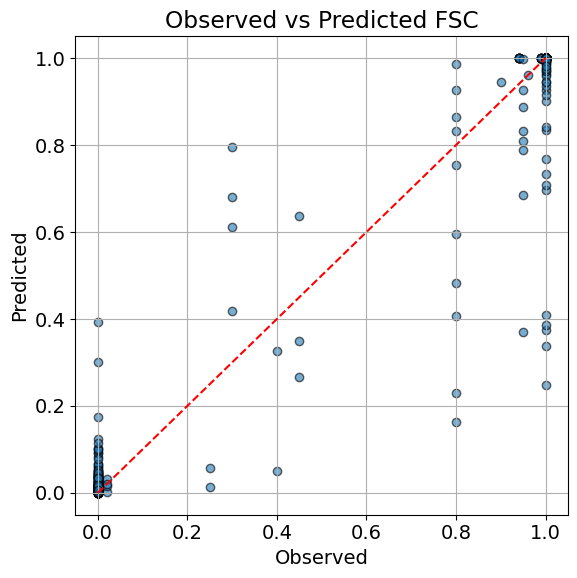

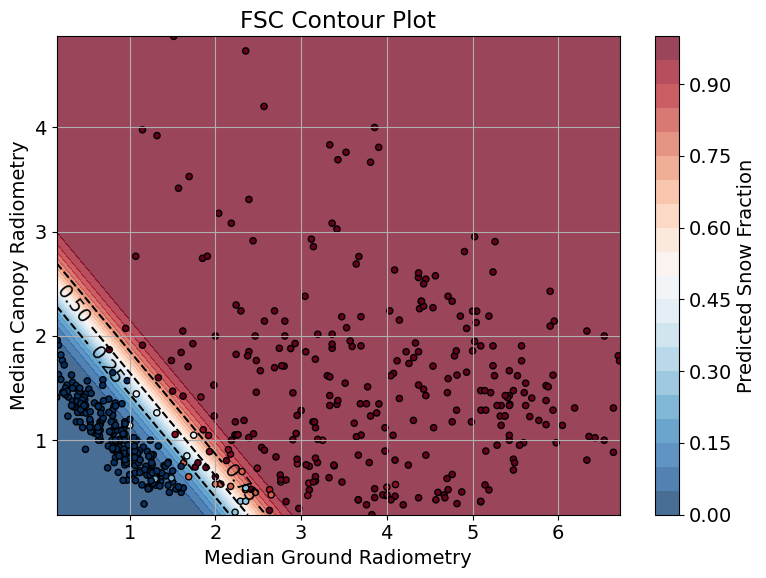

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix
import statsmodels.api as sm
from scipy.optimize import minimize_scalar
from collections import defaultdict

def fsc_bin(val):
    if val < 0.05:
        return "[0,0.05)"
    elif val < 0.5:
        return "[0.05,0.5)"
    elif val < 0.95:
        return "[0.5,0.95)"
    else:
        return "[0.95,1]"

def sharpen_probs(p, alpha):
    p = np.clip(p, 1e-6, 1 - 1e-6)
    return p**alpha / (p**alpha + (1 - p)**alpha)

# --- Preprocessing ---
df = frac_data.dropna(subset=["Eg_strong", "Ev_strong", "JointSnowBinary", "date", "camera"]).copy()
combined = df.copy()

X = combined[["Eg_strong", "Ev_strong"]]
y = combined["JointSnowBinary"]

family = sm.families.Binomial(link=sm.families.links.Probit())

# --- Custom Balanced Group Split by Camera ---
n_splits = 5
camera_groups = combined.groupby("camera")

# Sort cameras by total sample count
sorted_cameras = sorted(camera_groups.groups.keys(), key=lambda cam: len(camera_groups.get_group(cam)), reverse=True)

folds = [[] for _ in range(n_splits)]
fold_sample_counts = [0] * n_splits
fold_frac_counts = [0] * n_splits
camera_to_fold = {}

# Assign cameras with fractional data first
for cam in sorted_cameras:
    cam_data = camera_groups.get_group(cam)
    n = len(cam_data)
    has_fractional = ((cam_data["JointSnowBinary"] > 0) & (cam_data["JointSnowBinary"] < 1)).any()

    if has_fractional:
        idx = np.argmin(fold_frac_counts)
        folds[idx].extend(cam_data.index.tolist())
        fold_sample_counts[idx] += n
        fold_frac_counts[idx] += ((cam_data["JointSnowBinary"] > 0) & (cam_data["JointSnowBinary"] < 1)).sum()
        camera_to_fold[cam] = idx

# Assign remaining cameras (no fractional data)
for cam in sorted_cameras:
    if cam in camera_to_fold:
        continue
    cam_data = camera_groups.get_group(cam)
    n = len(cam_data)
    idx = np.argmin(fold_sample_counts)
    folds[idx].extend(cam_data.index.tolist())
    fold_sample_counts[idx] += n
    camera_to_fold[cam] = idx

# --- Print Camera Assignment ---
print("\nCamera-to-Fold Assignment:")
for i in range(n_splits):
    fold_cams = [cam for cam, f in camera_to_fold.items() if f == i]
    total_bin = 0
    total_frac = 0
    print(f"\nFold {i+1}:")
    for cam in fold_cams:
        cam_data = camera_groups.get_group(cam)
        n_total = len(cam_data)
        n_frac = ((cam_data["JointSnowBinary"] > 0) & (cam_data["JointSnowBinary"] < 1)).sum()
        n_bin = n_total - n_frac
        total_bin += n_bin
        total_frac += n_frac
        print(f"  - {cam}: {n_total} total ({n_bin} binary, {n_frac} fractional)")
    print(f"  >> Fold {i+1} Total: {total_bin + total_frac} points ({total_bin} binary, {total_frac} fractional)")

# --- Create list of splits (train_idx, val_idx) ---
merged_splits = []
all_indices = set(combined.index)
for i in range(n_splits):
    val_idx = folds[i]
    train_idx = list(all_indices - set(val_idx))
    merged_splits.append((train_idx, val_idx))

# --- Find Best Alpha ---
def evaluate_alpha(alpha):
    rmses = []
    for train_idx, val_idx in merged_splits:
        X_tr, X_val = X.loc[train_idx], X.loc[val_idx]
        y_tr, y_val = y.loc[train_idx], y.loc[val_idx]

        X_tr_sm = sm.add_constant(X_tr)
        X_val_sm = sm.add_constant(X_val)

        model = sm.GLM(y_tr, X_tr_sm, family=family)
        result = model.fit()
        y_pred = result.predict(X_val_sm)
        y_pred = sharpen_probs(y_pred, alpha)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)
    return np.mean(rmses)

res = minimize_scalar(evaluate_alpha, bounds=(1, 10), method='bounded')
best_alpha = res.x
print(f"\nBest alpha: {best_alpha:.4f} with RMSE: {res.fun:.4f}")

# --- Cross-validation with best alpha ---
rmses = []
rmses_frac = []
biases = []
biases_frac = []
bin_accuracies = []

all_y_val = []
all_y_pred = []
all_Eg_val = []
all_Ev_val = []
all_yval_color = []
all_actual_bins = []
all_pred_bins = []

for train_idx, val_idx in merged_splits:
    X_tr, X_val = X.loc[train_idx], X.loc[val_idx]
    y_tr, y_val = y.loc[train_idx], y.loc[val_idx]

    X_tr_sm = sm.add_constant(X_tr)
    X_val_sm = sm.add_constant(X_val)

    model = sm.GLM(y_tr, X_tr_sm, family=family)
    result = model.fit()
    y_pred = sharpen_probs(result.predict(X_val_sm), best_alpha)

    actual_bins = y_val.apply(fsc_bin)
    pred_bins = pd.Series(y_pred, index=y_val.index).apply(fsc_bin)
    bin_accuracy = (actual_bins == pred_bins).mean()
    bin_accuracies.append(bin_accuracy)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    bias = np.mean(y_pred - y_val)
    rmses.append(rmse)
    biases.append(bias)

    mask_frac = (y_val > 0) & (y_val < 1)
    if mask_frac.sum() > 0:
        frac_rmse = np.sqrt(mean_squared_error(y_val[mask_frac], y_pred[mask_frac]))
        frac_bias = np.mean(y_pred[mask_frac] - y_val[mask_frac])
        rmses_frac.append(frac_rmse)
        biases_frac.append(frac_bias)

    all_y_val.extend(y_val)
    all_y_pred.extend(y_pred)
    all_Eg_val.extend(X_val["Eg_strong"])
    all_Ev_val.extend(X_val["Ev_strong"])
    all_yval_color.extend(y_val)
    all_actual_bins.extend(actual_bins)
    all_pred_bins.extend(pred_bins)

# --- Final model ---
X_sm = sm.add_constant(X)
final_model = sm.GLM(y, X_sm, family=family).fit()

# --- Summary ---
print(f"\nCross-Validation RMSE (mean ± std): {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")
print(f"Cross-Validation Bias (mean ± std): {np.mean(biases):.4f} ± {np.std(biases):.4f}")
print(f"Fractional RMSE (mean ± std): {np.mean(rmses_frac):.4f} ± {np.std(rmses_frac):.4f}")
print(f"Fractional Bias (mean ± std): {np.mean(biases_frac):.4f} ± {np.std(biases_frac):.4f}")
print(f"Classification Accuracy (4-bin): {np.mean(bin_accuracies):.2%}")

bin_labels = ["[0,0.05)", "[0.05,0.5)", "[0.5,0.95)", "[0.95,1]"]
conf = confusion_matrix(all_actual_bins, all_pred_bins, labels=bin_labels)
conf_df = pd.DataFrame(conf, index=bin_labels, columns=bin_labels)
print("\nConfusion Matrix (Aggregated across folds):")
print(conf_df)

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(all_y_val, all_y_pred, alpha=0.6, edgecolor='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs Predicted FSC")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Contour Plot ---
eg_range = np.linspace(df["Eg_strong"].min(), df["Eg_strong"].max(), 300)
ev_range = np.linspace(df["Ev_strong"].min(), df["Ev_strong"].max(), 300)
Eg_grid, Ev_grid = np.meshgrid(eg_range, ev_range)

grid_df = pd.DataFrame({
    "Eg_strong": Eg_grid.ravel(),
    "Ev_strong": Ev_grid.ravel(),
})
grid_df["const"] = 1
grid_df = grid_df[["const", "Eg_strong", "Ev_strong"]]

Z = final_model.predict(grid_df)
Z = sharpen_probs(Z, best_alpha)
Z = Z.values.reshape(Eg_grid.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(Eg_grid, Ev_grid, Z, levels=np.linspace(0, 1, 21), cmap='RdBu_r', alpha=0.75)
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Snow Fraction')

lines = plt.contour(Eg_grid, Ev_grid, Z, levels=[0, 0.25, 0.5, 0.75, 1], colors='k', linestyles='--')
plt.clabel(lines, fmt='%1.2f')

plt.scatter(all_Eg_val, all_Ev_val, c=all_yval_color, cmap='RdBu_r', edgecolor='k', s=20)
plt.xlabel("Median Ground Radiometry")
plt.ylabel("Median Canopy Radiometry")
plt.title("FSC Contour Plot")
plt.grid(True)
plt.tight_layout()
plt.show()



Camera-to-Fold Assignment:
Fold 1: sodankyla_full, underc, wslcreek
Fold 2: old_jack_pine, oregon_yp, tammela, torgnon
Fold 3: kenttarova, varrio, queens, bartlett, underhill
Fold 4: marcell_MN, glees, willowcreek, lacclair
Fold 5: delta_junction, hyytiala

Best alpha: 1.0725 with RMSE: 0.0986

Cross-Validation RMSE (mean ± std): 0.0986 ± 0.0602
Cross-Validation Bias (mean ± std): -0.0058 ± 0.0117
Fractional RMSE (mean ± std): 0.2182 ± 0.1204
Fractional Bias (mean ± std): -0.0808 ± 0.1130
Classification Accuracy (4-bin): 86.76%

Confusion Matrix (Aggregated across folds):
            [0,0.05)  [0.05,0.5)  [0.5,0.95)  [0.95,1]
[0,0.05)         191          28           1         0
[0.05,0.5)         2           5           4         0
[0.5,0.95)         1           4           7         8
[0.95,1]           0           6          16       263


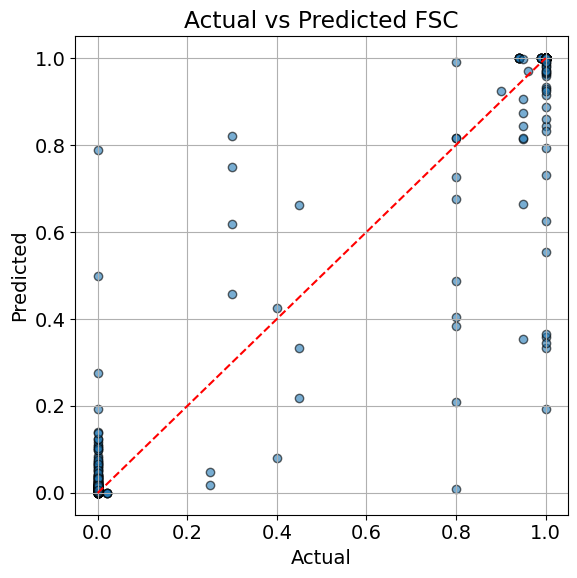

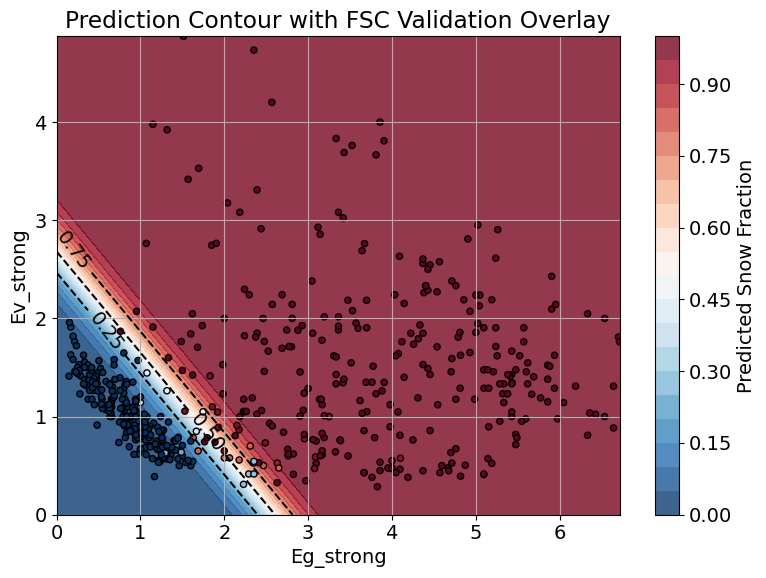

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix
import statsmodels.api as sm
from scipy.optimize import minimize_scalar

def fsc_bin(val):
    if val < 0.05:
        return "[0,0.05)"
    elif val < 0.5:
        return "[0.05,0.5)"
    elif val < 0.95:
        return "[0.5,0.95)"
    else:
        return "[0.95,1]"

def sharpen_probs(p, alpha):
    p = np.clip(p, 1e-6, 1 - 1e-6)
    return p**alpha / (p**alpha + (1 - p)**alpha)

# --- Preprocessing ---
df = frac_data.dropna(subset=["Eg_strong", "Ev_strong", "pv", "pg", "pvpg", "JointSnowBinary", "date", "camera"]).copy()
combined = df.copy()

X = combined[["Eg_strong", "Ev_strong", "pv", "pg", "pvpg"]]
y = combined["JointSnowBinary"]

family = sm.families.Binomial(link=sm.families.links.Probit())

# --- Custom Group Balanced Splits by Camera ---
n_splits = 5
camera_groups = combined.groupby("camera")

# Sort by count (descending)
sorted_cameras = sorted(camera_groups.groups.keys(), key=lambda cam: len(camera_groups.get_group(cam)), reverse=True)

folds = [[] for _ in range(n_splits)]
fold_sample_counts = [0] * n_splits
fold_frac_counts = [0] * n_splits
camera_to_fold = {}

# Assign cameras with fractional data first
for cam in sorted_cameras:
    cam_data = camera_groups.get_group(cam)
    n = len(cam_data)
    has_fractional = ((cam_data["JointSnowBinary"] > 0) & (cam_data["JointSnowBinary"] < 1)).any()

    if has_fractional:
        idx = np.argmin(fold_frac_counts)
        folds[idx].extend(cam_data.index.tolist())
        fold_sample_counts[idx] += n
        fold_frac_counts[idx] += ((cam_data["JointSnowBinary"] > 0) & (cam_data["JointSnowBinary"] < 1)).sum()
        camera_to_fold[cam] = idx

# Assign remaining cameras (no fractional data)
for cam in sorted_cameras:
    if cam in camera_to_fold:
        continue
    cam_data = camera_groups.get_group(cam)
    n = len(cam_data)
    idx = np.argmin(fold_sample_counts)
    folds[idx].extend(cam_data.index.tolist())
    fold_sample_counts[idx] += n
    camera_to_fold[cam] = idx

# --- Print Camera Assignment ---
print("\nCamera-to-Fold Assignment:")
for i in range(n_splits):
    fold_cams = [cam for cam, f in camera_to_fold.items() if f == i]
    print(f"Fold {i+1}: {', '.join(fold_cams)}")

# Create merged splits
merged_splits = []
all_indices = set(combined.index)
for i in range(n_splits):
    val_idx = folds[i]
    train_idx = list(all_indices - set(val_idx))
    merged_splits.append((train_idx, val_idx))

# --- Alpha Tuning ---
def evaluate_alpha(alpha):
    rmses = []
    for train_idx, val_idx in merged_splits:
        X_tr, X_val = X.loc[train_idx], X.loc[val_idx]
        y_tr, y_val = y.loc[train_idx], y.loc[val_idx]

        X_tr_sm = sm.add_constant(X_tr)
        X_val_sm = sm.add_constant(X_val)

        model = sm.GLM(y_tr, X_tr_sm, family=family)
        result = model.fit()
        y_pred = result.predict(X_val_sm)
        y_pred = sharpen_probs(y_pred, alpha)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)
    return np.mean(rmses)

res = minimize_scalar(evaluate_alpha, bounds=(1, 2), method='bounded')
best_alpha = res.x
print(f"\nBest alpha: {best_alpha:.4f} with RMSE: {res.fun:.4f}")

# --- Cross-validation with best alpha ---
rmses = []
rmses_frac = []
biases = []
biases_frac = []
bin_accuracies = []

all_y_val = []
all_y_pred = []
all_Eg_val = []
all_Ev_val = []
all_pg_val = []
all_pv_val = []
all_yval_color = []
all_actual_bins = []
all_pred_bins = []

for train_idx, val_idx in merged_splits:
    X_tr, X_val = X.loc[train_idx], X.loc[val_idx]
    y_tr, y_val = y.loc[train_idx], y.loc[val_idx]

    X_tr_sm = sm.add_constant(X_tr)
    X_val_sm = sm.add_constant(X_val)

    model = sm.GLM(y_tr, X_tr_sm, family=family)
    result = model.fit()
    y_pred = sharpen_probs(result.predict(X_val_sm), best_alpha)

    actual_bins = y_val.apply(fsc_bin)
    pred_bins = pd.Series(y_pred, index=y_val.index).apply(fsc_bin)
    bin_accuracy = (actual_bins == pred_bins).mean()
    bin_accuracies.append(bin_accuracy)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    bias = np.mean(y_pred - y_val)
    rmses.append(rmse)
    biases.append(bias)

    mask_frac = (y_val > 0) & (y_val < 1)
    if mask_frac.sum() > 0:
        frac_rmse = np.sqrt(mean_squared_error(y_val[mask_frac], y_pred[mask_frac]))
        frac_bias = np.mean(y_pred[mask_frac] - y_val[mask_frac])
        rmses_frac.append(frac_rmse)
        biases_frac.append(frac_bias)

    all_y_val.extend(y_val)
    all_y_pred.extend(y_pred)
    all_Eg_val.extend(X_val["Eg_strong"])
    all_Ev_val.extend(X_val["Ev_strong"])
    all_pg_val.extend(X_val["pg"])
    all_pv_val.extend(X_val["pv"])
    all_yval_color.extend(y_val)
    all_actual_bins.extend(actual_bins)
    all_pred_bins.extend(pred_bins)

# --- Final model ---
X_sm = sm.add_constant(X)
final_model = sm.GLM(y, X_sm, family=family).fit()

# --- Summary ---
print(f"\nCross-Validation RMSE (mean ± std): {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")
print(f"Cross-Validation Bias (mean ± std): {np.mean(biases):.4f} ± {np.std(biases):.4f}")
print(f"Fractional RMSE (mean ± std): {np.mean(rmses_frac):.4f} ± {np.std(rmses_frac):.4f}")
print(f"Fractional Bias (mean ± std): {np.mean(biases_frac):.4f} ± {np.std(biases_frac):.4f}")
print(f"Classification Accuracy (4-bin): {np.mean(bin_accuracies):.2%}")

bin_labels = ["[0,0.05)", "[0.05,0.5)", "[0.5,0.95)", "[0.95,1]"]
conf = confusion_matrix(all_actual_bins, all_pred_bins, labels=bin_labels)
conf_df = pd.DataFrame(conf, index=bin_labels, columns=bin_labels)
print("\nConfusion Matrix (Aggregated across folds):")
print(conf_df)

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(all_y_val, all_y_pred, alpha=0.6, edgecolor='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FSC")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Prediction Contour Plot ---
eg_vals = np.linspace(0, X["Eg_strong"].max(), 300)
ev_vals = np.linspace(0, X["Ev_strong"].max(), 300)
EG, EV = np.meshgrid(eg_vals, ev_vals)

Eg_fixed = X["Eg_strong"].median()
Ev_fixed = X["Ev_strong"].median()
pv_fixed = X["pv"].median()
pg_fixed = X["pg"].median()
pvpg_fixed = X["pvpg"].median()

grid_df = pd.DataFrame({
    "const": 1,
    "Eg_strong": EG.ravel(),
    "Ev_strong": EV.ravel(),
    "pv": pv_fixed,
    "pg": pg_fixed,
    "pvpg": pvpg_fixed
})
grid_df = sm.add_constant(grid_df)

Z = final_model.predict(grid_df)
Z = sharpen_probs(Z, best_alpha)
Z = Z.to_numpy().reshape(EG.shape)

plt.figure(figsize=(8, 6))
contour = plt.contourf(EG, EV, Z, levels=np.linspace(0, 1, 21), cmap='RdBu_r', alpha=0.8)
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Snow Fraction')

lines = plt.contour(EG, EV, Z, levels=[0, 0.25, 0.5, 0.75, 1], colors='k', linestyles='--')
plt.clabel(lines, fmt='%1.2f')

plt.scatter(all_Eg_val, all_Ev_val, c=all_yval_color, cmap='RdBu_r', edgecolor='k', s=20)

plt.xlabel("Eg_strong")
plt.ylabel("Ev_strong")
plt.title("Prediction Contour with FSC Validation Overlay")
plt.grid(True)
plt.tight_layout()
plt.show()


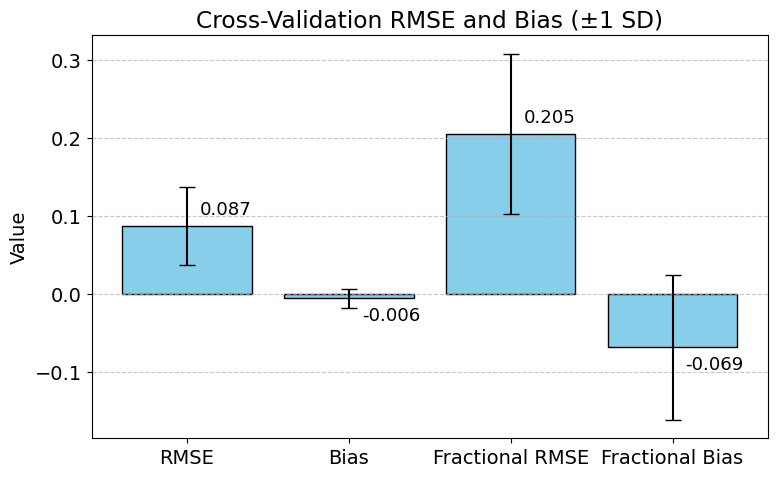

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
metrics = [
    "RMSE",
    "Bias",
    "Fractional RMSE",
    "Fractional Bias"
]

means = [
    np.mean(rmses),
    np.mean(biases),
    np.mean(rmses_frac),
    np.mean(biases_frac)
]

stds = [
    np.std(rmses),
    np.std(biases),
    np.std(rmses_frac),
    np.std(biases_frac)
]

# Plotting
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
bars = plt.bar(x, means, yerr=stds, capsize=6, color='skyblue', edgecolor='black')

# Add labels offset slightly to the right of each bar
for bar, mean in zip(bars, means):
    height = bar.get_height()
    x_offset = bar.get_x() + bar.get_width() * 0.6  # shift label to the right
    y_offset = 0.01 * np.sign(height)
    plt.text(x_offset, height + y_offset, f"{mean:.3f}",
             ha='left', va='bottom' if height >= 0 else 'top', fontsize=13)

plt.xticks(x, metrics)
plt.ylabel("Value")
plt.title("Cross-Validation RMSE and Bias (±1 SD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig("poster_reclassified_probit_cv_metrics_5fold.svg")
plt.show()


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0



Final model a: 0.8368, b: 1.7270
Final beta: {'const': -2.563748028110859, 'Eg_strong': 1.6778429899605447, 'Ev_strong': 1.2627092423317379, 'pv': 0.6480709303030983, 'pg': -0.08885919511094217, 'pvpg': -1.1258658739412382}

Cross-Validation RMSE (mean ± std): 0.1171 ± 0.0478
Cross-Validation Bias (mean ± std): 0.0064 ± 0.0187
Fractional RMSE (mean ± std): 0.3151 ± 0.1425
Fractional Bias (mean ± std): 0.0343 ± 0.1956
Classification Accuracy (4-bin): 94.83%

Confusion Matrix (Aggregated across folds):
            [0,0.05)  [0.05,0.5)  [0.5,0.95)  [0.95,1]
[0,0.05)         212           0           1         2
[0.05,0.5)         2           2           0         6
[0.5,0.95)         2           2           3        11
[0.95,1]           0           1           0       278


/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


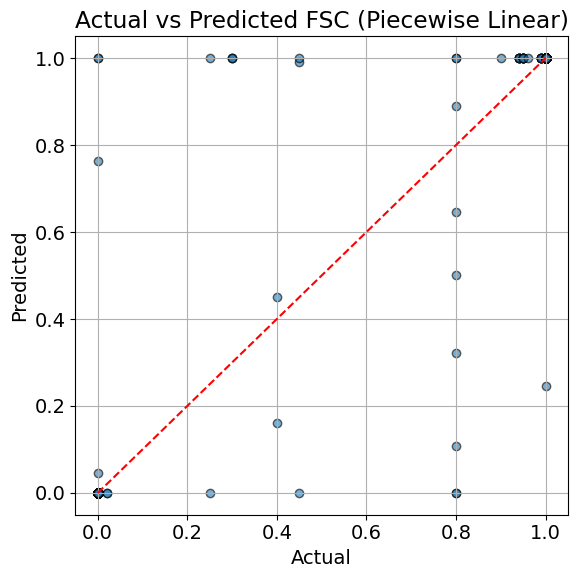

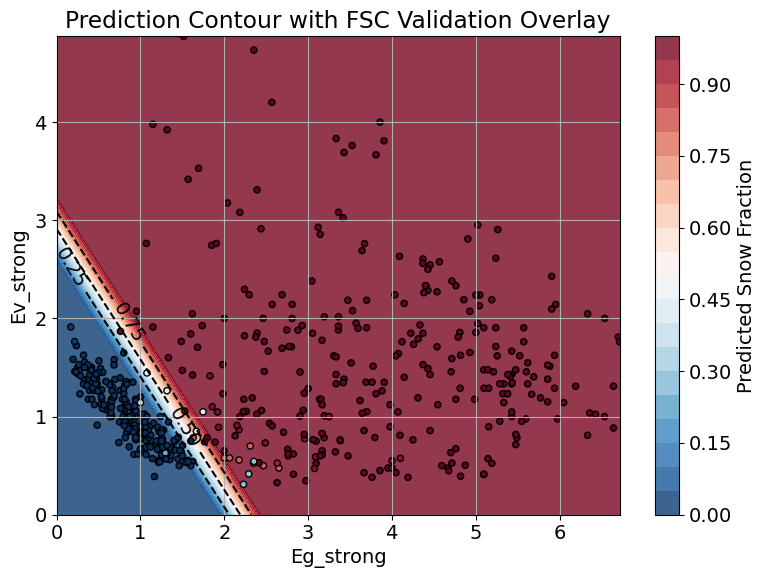

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, confusion_matrix
from scipy.optimize import minimize

# --- Piecewise linear mapping ---
def piecewise_map(z, a, b):
    z = np.asarray(z)
    result = np.zeros_like(z)
    result[z >= b] = 1
    mask = (z > a) & (z < b)
    result[mask] = (z[mask] - a) / (b - a)
    return result

def fsc_bin(val):
    if val < 0.05:
        return "[0,0.05)"
    elif val < 0.5:
        return "[0.05,0.5)"
    elif val < 0.95:
        return "[0.5,0.95)"
    else:
        return "[0.95,1]"

# --- Preprocessing ---
df = frac_data.dropna(subset=["Eg_strong", "Ev_strong", "pv", "pg", "pvpg", "JointSnowBinary", "date"]).copy()
combined = df.copy()

X_raw = combined[["Eg_strong", "Ev_strong", "pv", "pg", "pvpg"]].copy()
X = X_raw.copy()
X.insert(0, "const", 1)
y = combined["JointSnowBinary"]
groups = combined["date"]
X_cols = X.columns

# --- Stratified GroupKFold on binary vs fractional data ---
binary_mask = (y == 0) | (y == 1)
frac_mask = ~binary_mask
gkf = GroupKFold(n_splits=5)

binary_splits = list(gkf.split(X[binary_mask], y[binary_mask], groups=groups[binary_mask]))
frac_splits = list(gkf.split(X[frac_mask], y[frac_mask], groups=groups[frac_mask]))

merged_splits = []
for (b_tr, b_val), (f_tr, f_val) in zip(binary_splits, frac_splits):
    train_idx = X[binary_mask].index[b_tr].tolist() + X[frac_mask].index[f_tr].tolist()
    val_idx = X[binary_mask].index[b_val].tolist() + X[frac_mask].index[f_val].tolist()
    merged_splits.append((train_idx, val_idx))

# --- Cross-validation ---
rmses, rmses_frac, biases, biases_frac, bin_accuracies = [], [], [], [], []
all_y_val, all_y_pred = [], []
all_Eg_val, all_Ev_val, all_yval_color = [], [], []
all_actual_bins, all_pred_bins = [], []

for train_idx, val_idx in merged_splits:
    X_tr = X.loc[train_idx].values
    y_tr = y.loc[train_idx].values
    X_val = X.loc[val_idx].values
    y_val = y.loc[val_idx]

    def objective(params):
        a, b = params[-2], params[-1]
        if b <= a:
            return np.inf
        beta = params[:-2]
        z = X_tr @ beta
        y_pred = piecewise_map(z, a, b)
        return np.sqrt(mean_squared_error(y_tr, y_pred))

    init_params = np.zeros(X_tr.shape[1] + 2)
    init_params[-2] = -1
    init_params[-1] = 1
    res = minimize(objective, init_params, method='L-BFGS-B')
    params = res.x
    beta, a, b = params[:-2], params[-2], params[-1]

    z_val = X_val @ beta
    y_pred = piecewise_map(z_val, a, b)

    actual_bins = y_val.apply(fsc_bin)
    pred_bins = pd.Series(y_pred, index=y_val.index).apply(fsc_bin)
    bin_accuracy = (actual_bins == pred_bins).mean()
    bin_accuracies.append(bin_accuracy)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    bias = np.mean(y_pred - y_val)
    rmses.append(rmse)
    biases.append(bias)

    mask_frac = (y_val > 0) & (y_val < 1)
    if mask_frac.sum() > 0:
        frac_rmse = np.sqrt(mean_squared_error(y_val[mask_frac], y_pred[mask_frac]))
        frac_bias = np.mean(y_pred[mask_frac] - y_val[mask_frac])
        rmses_frac.append(frac_rmse)
        biases_frac.append(frac_bias)

    all_y_val.extend(y_val)
    all_y_pred.extend(y_pred)
    all_Eg_val.extend(X_raw.loc[val_idx, "Eg_strong"])
    all_Ev_val.extend(X_raw.loc[val_idx, "Ev_strong"])
    all_yval_color.extend(y_val)
    all_actual_bins.extend(actual_bins)
    all_pred_bins.extend(pred_bins)

# --- Final model on all data ---
X_all = X.values
y_all = y.values

def final_objective(params):
    a, b = params[-2], params[-1]
    if b <= a:
        return np.inf
    beta = params[:-2]
    z = X_all @ beta
    y_pred = piecewise_map(z, a, b)
    return np.sqrt(mean_squared_error(y_all, y_pred))

init_params = np.zeros(X_all.shape[1] + 2)
init_params[-2] = -1
init_params[-1] = 1
res_final = minimize(final_objective, init_params, method='L-BFGS-B')
params_final = res_final.x
beta_final, a_final, b_final = params_final[:-2], params_final[-2], params_final[-1]
print(f"\nFinal model a: {a_final:.4f}, b: {b_final:.4f}")
print("Final beta:", dict(zip(X_cols, beta_final)))


# --- Summary ---
print(f"\nCross-Validation RMSE (mean ± std): {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")
print(f"Cross-Validation Bias (mean ± std): {np.mean(biases):.4f} ± {np.std(biases):.4f}")
print(f"Fractional RMSE (mean ± std): {np.mean(rmses_frac):.4f} ± {np.std(rmses_frac):.4f}")
print(f"Fractional Bias (mean ± std): {np.mean(biases_frac):.4f} ± {np.std(biases_frac):.4f}")
print(f"Classification Accuracy (4-bin): {np.mean(bin_accuracies):.2%}")

bin_labels = ["[0,0.05)", "[0.05,0.5)", "[0.5,0.95)", "[0.95,1]"]
conf = confusion_matrix(all_actual_bins, all_pred_bins, labels=bin_labels)
conf_df = pd.DataFrame(conf, index=bin_labels, columns=bin_labels)
print("\nConfusion Matrix (Aggregated across folds):")
print(conf_df)

# --- Plot 1: Actual vs Predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(all_y_val, all_y_pred, alpha=0.6, edgecolor='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted FSC (Piecewise Linear)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Prediction Grid ---
eg_vals = np.linspace(0, X_raw["Eg_strong"].max(), 300)
ev_vals = np.linspace(0, X_raw["Ev_strong"].max(), 300)
EG, EV = np.meshgrid(eg_vals, ev_vals)

pv_fixed = X_raw["pv"].median()
pg_fixed = X_raw["pg"].median()
pvpg_fixed = X_raw["pvpg"].median()

grid_df = pd.DataFrame({
    "const": 1,
    "Eg_strong": EG.ravel(),
    "Ev_strong": EV.ravel(),
    "pv": pv_fixed,
    "pg": pg_fixed,
    "pvpg": pvpg_fixed
})
z_grid = grid_df.values @ beta_final
Z = piecewise_map(z_grid, a_final, b_final).reshape(EG.shape)

# --- Contour Plot ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(EG, EV, Z, levels=np.linspace(0, 1, 21), cmap='RdBu_r', alpha=0.8)
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Snow Fraction')

lines = plt.contour(EG, EV, Z, levels=[0.25, 0.5, 0.75], colors='k', linestyles='--')
plt.clabel(lines, fmt='%1.2f')

plt.scatter(all_Eg_val, all_Ev_val, c=all_yval_color, cmap='RdBu_r', edgecolor='k', s=20)
plt.xlabel("Eg_strong")
plt.ylabel("Ev_strong")
plt.title("Prediction Contour with FSC Validation Overlay")
plt.grid(True)
plt.tight_layout()
plt.show()


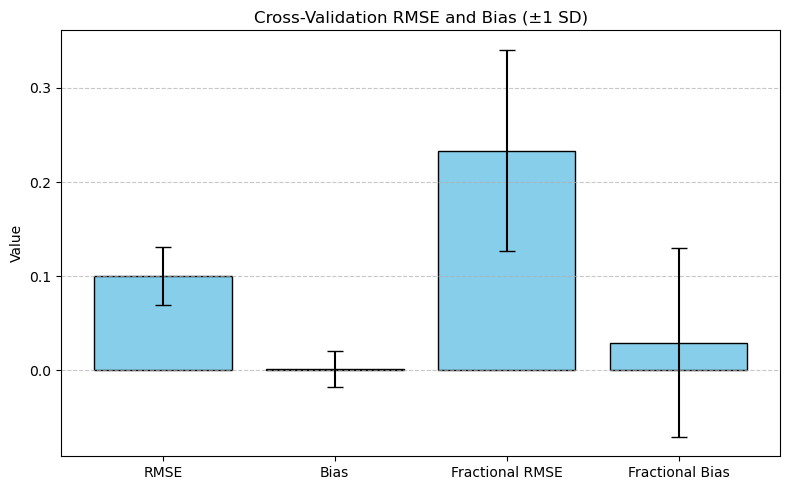

In [25]:
import matplotlib.pyplot as plt

# Data to plot
metrics = [
    "RMSE",
    "Bias",
    "Fractional RMSE",
    "Fractional Bias"
]

means = [
    np.mean(rmses),
    np.mean(biases),
    np.mean(rmses_frac),
    np.mean(biases_frac)
]

stds = [
    np.std(rmses),
    np.std(biases),
    np.std(rmses_frac),
    np.std(biases_frac)
]

# Plotting
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
plt.bar(x, means, yerr=stds, capsize=6, color='skyblue', edgecolor='black')
plt.xticks(x, metrics)
plt.ylabel("Value")
plt.title("Cross-Validation RMSE and Bias (±1 SD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig("poster_fraction_probit_cv_metrics_more.svg")
plt.show()


### Plotting fractional data

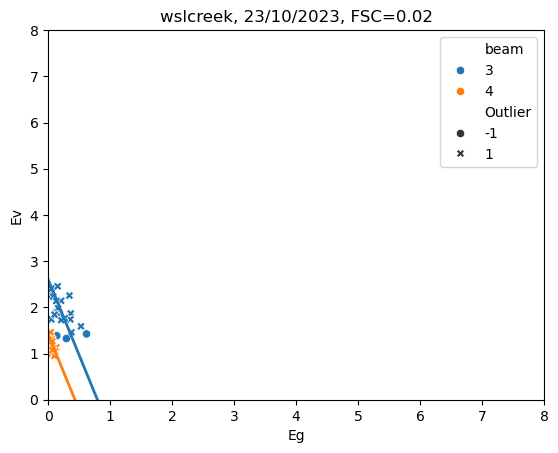

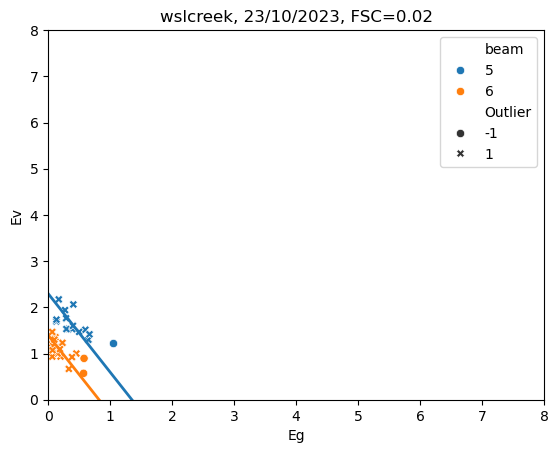

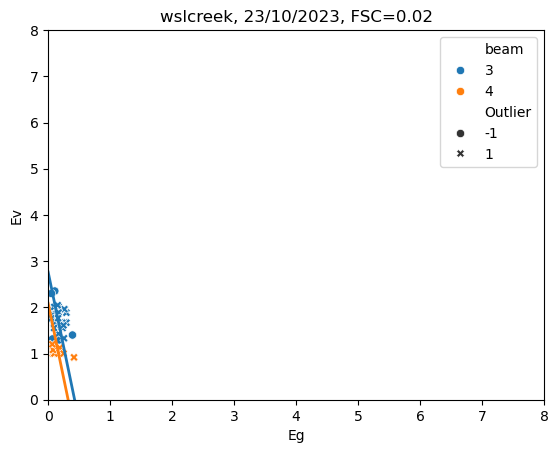

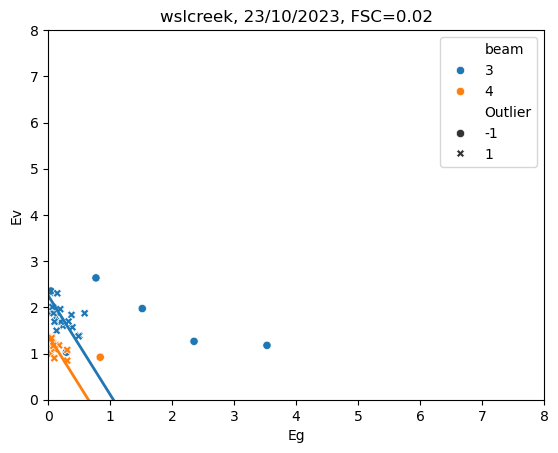

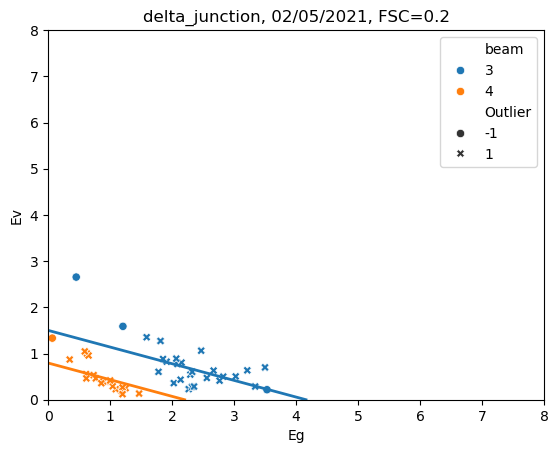

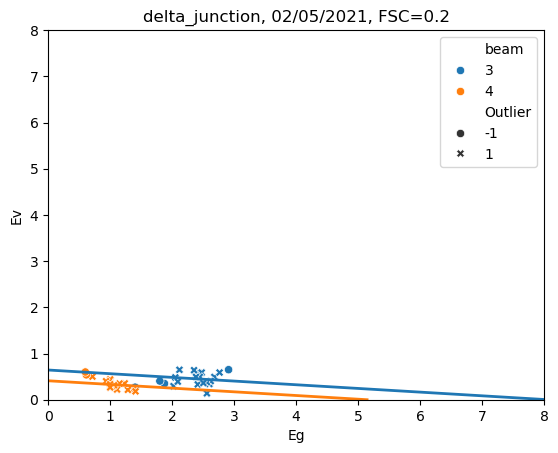

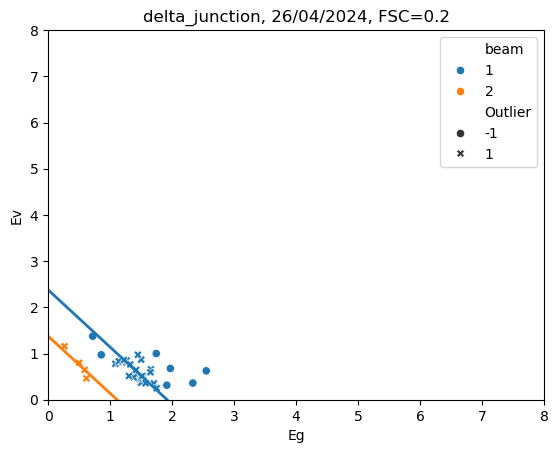

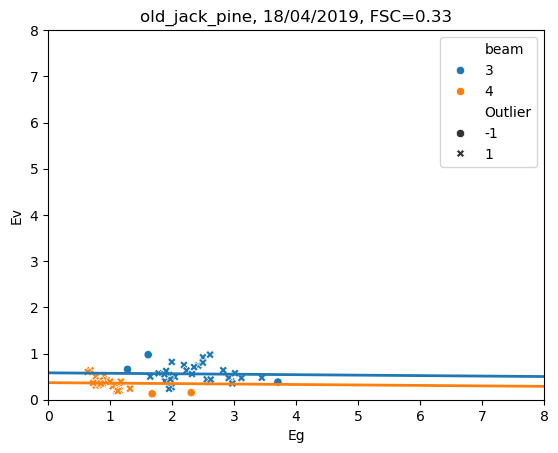

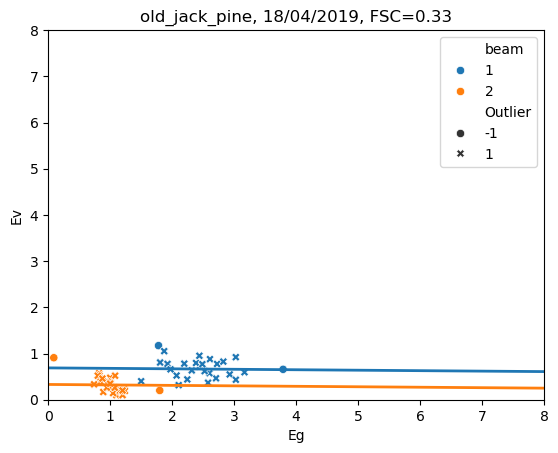

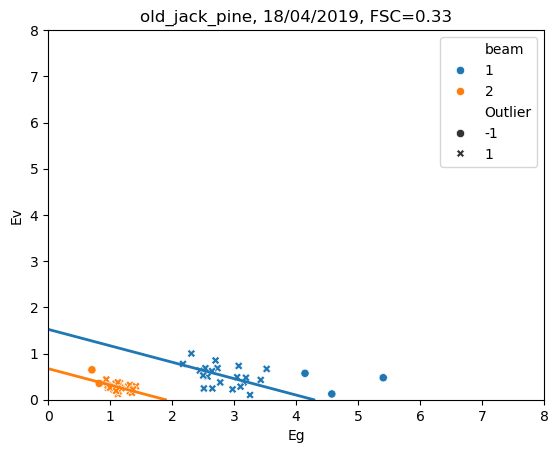

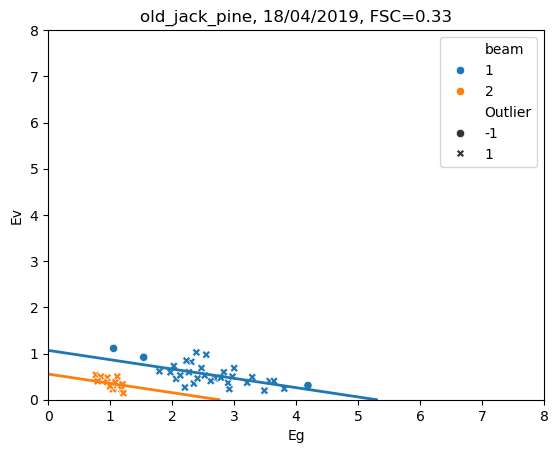

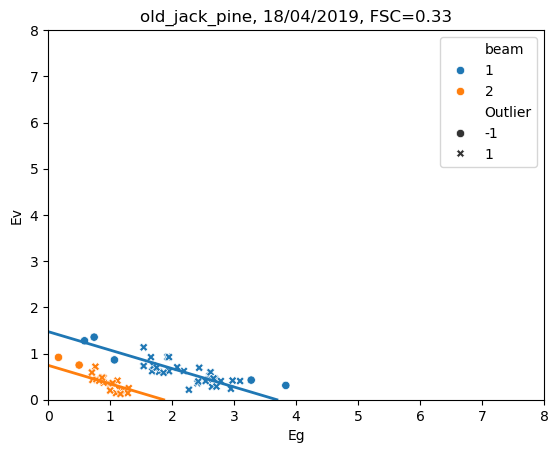

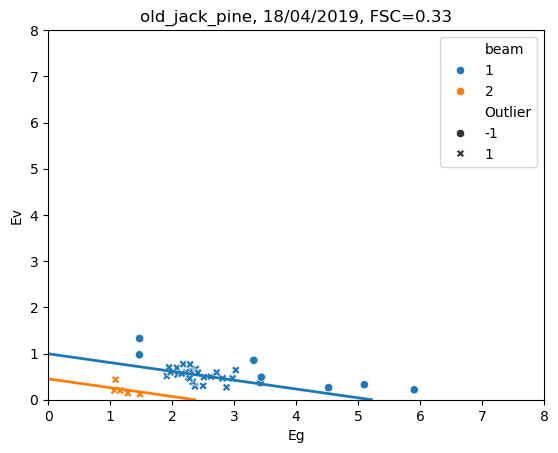

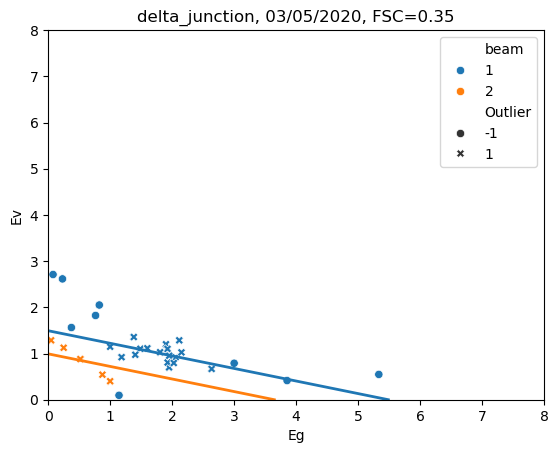

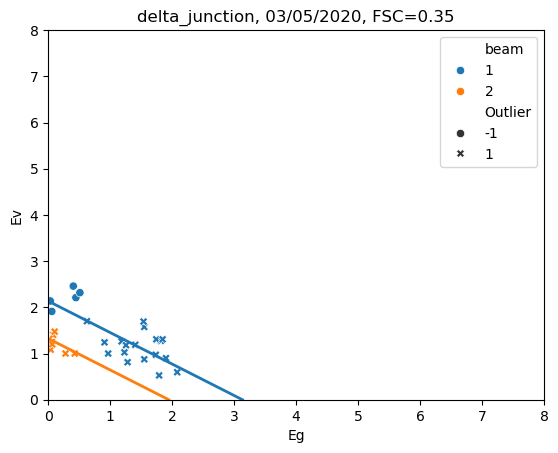

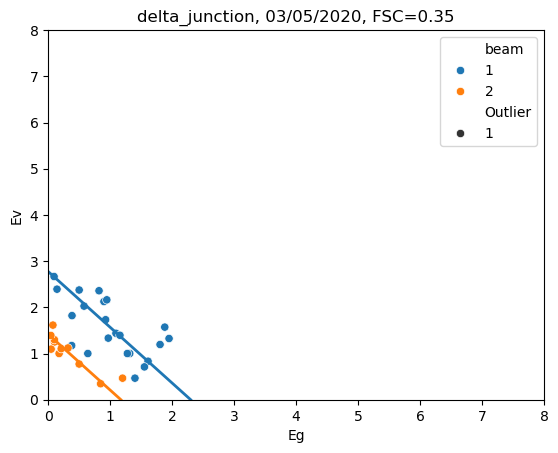

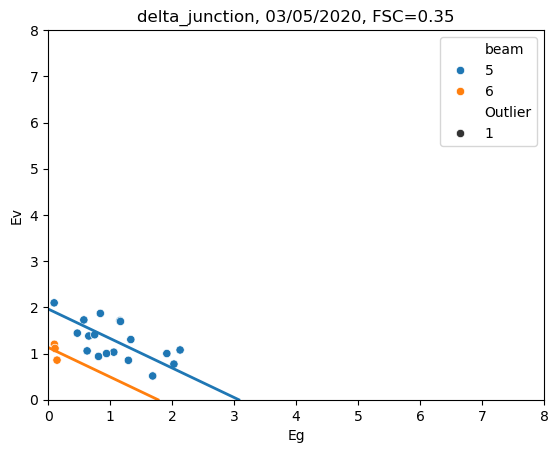

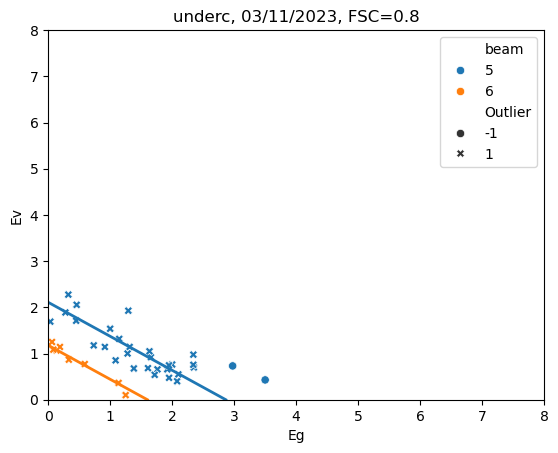

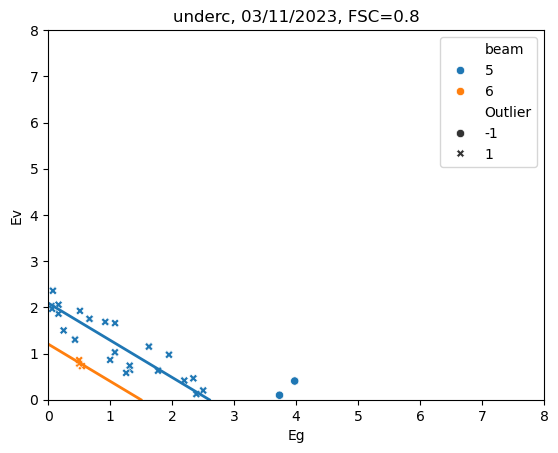

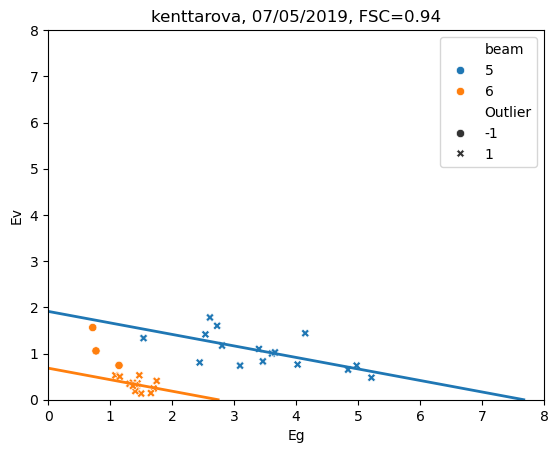

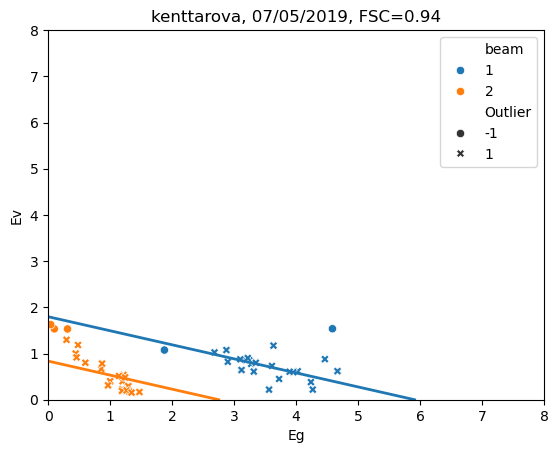

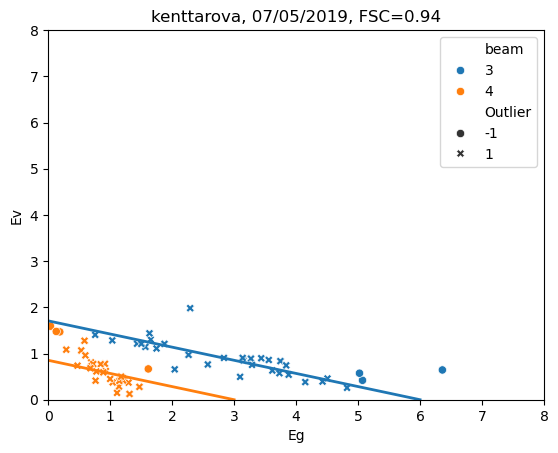

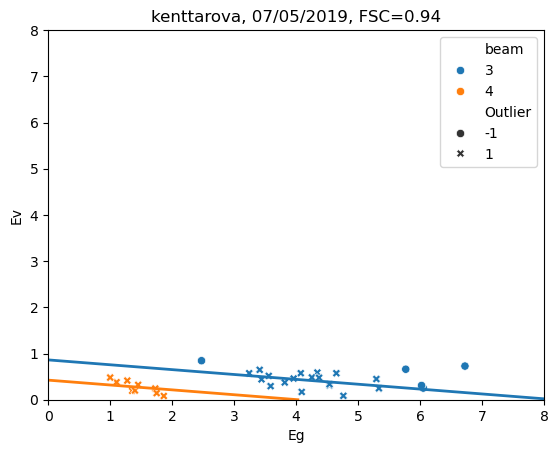

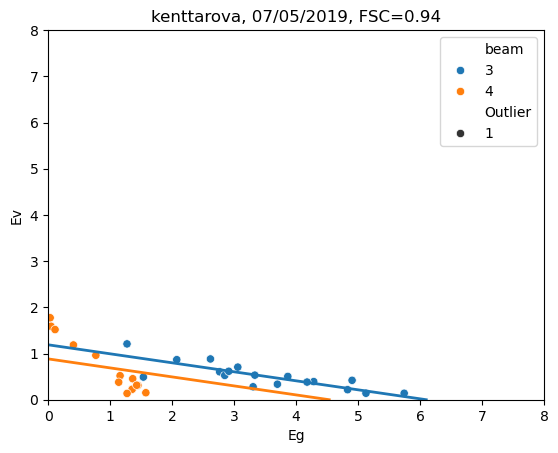

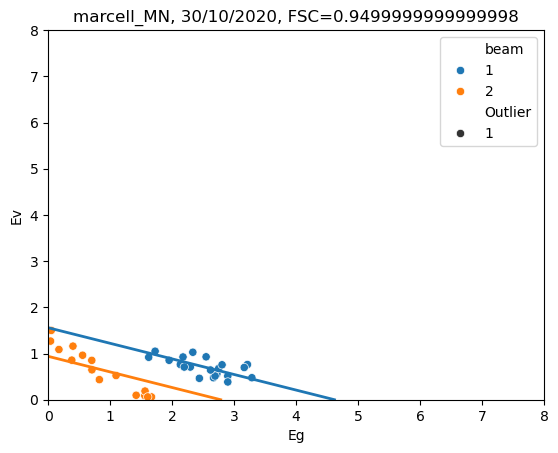

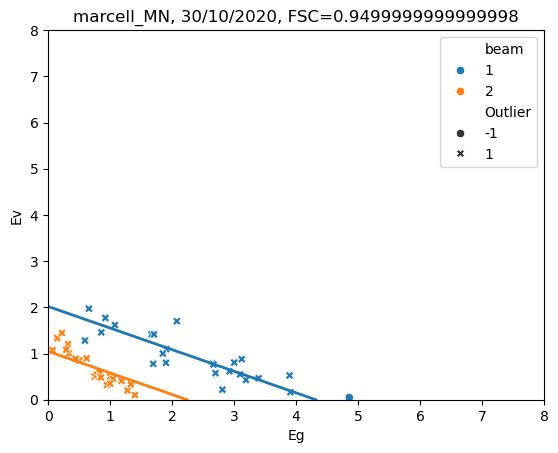

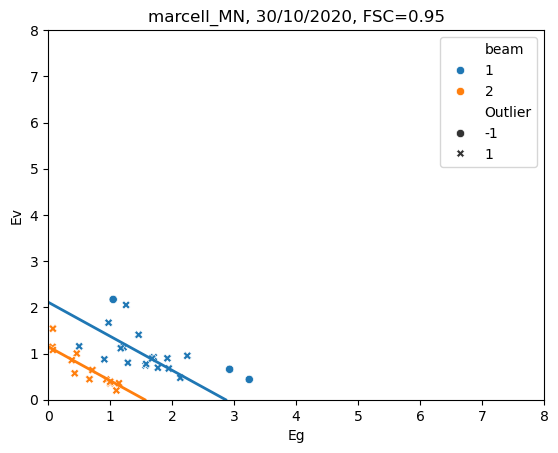

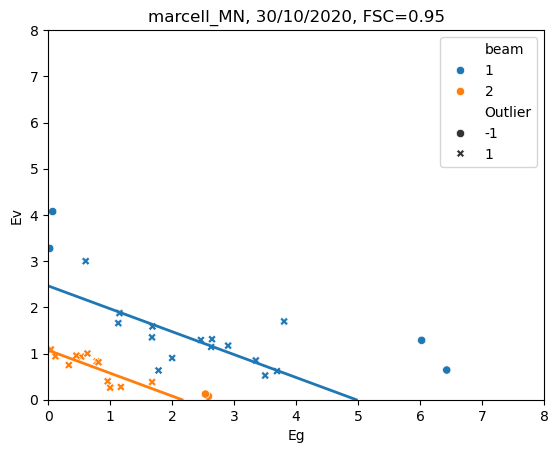

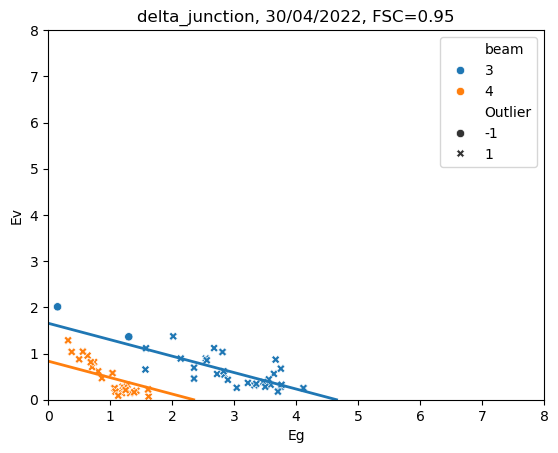

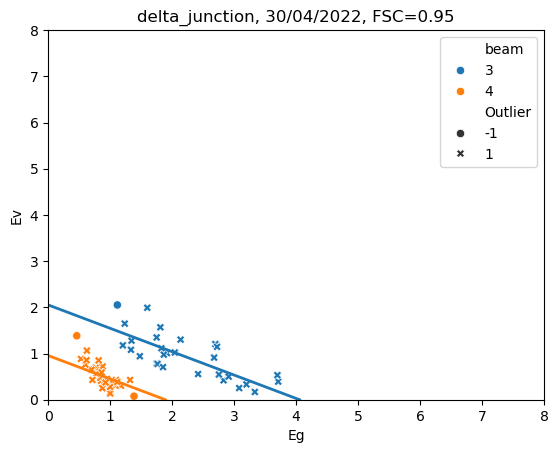

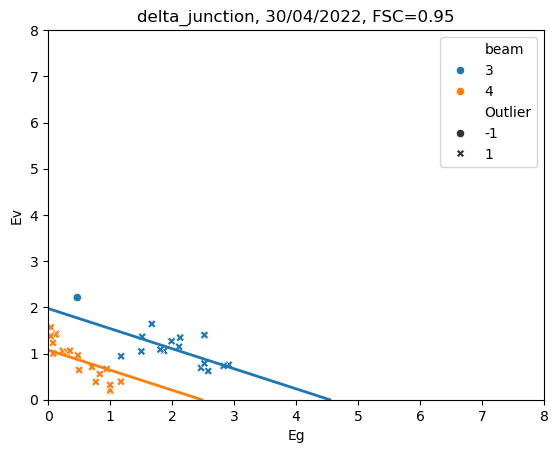

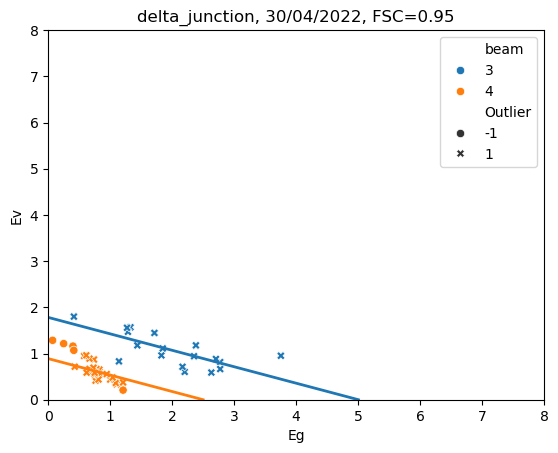

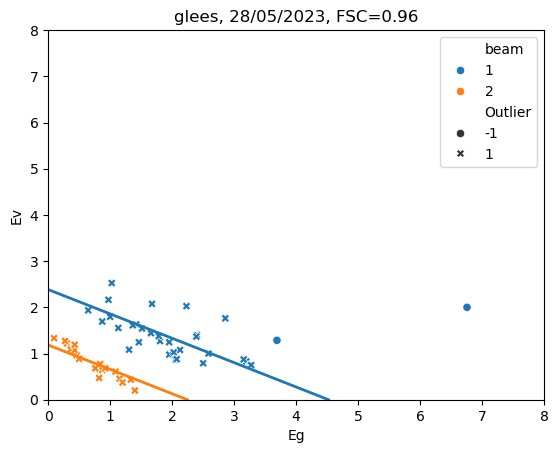

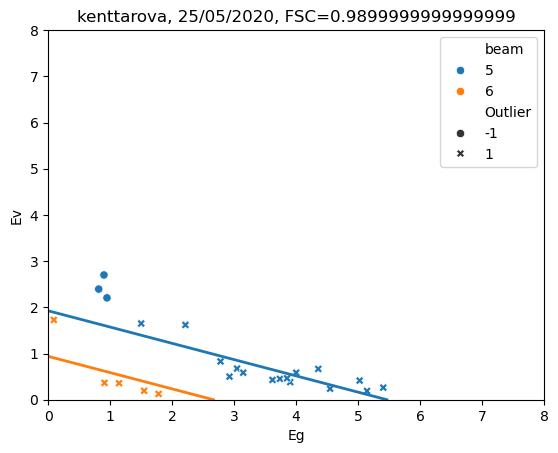

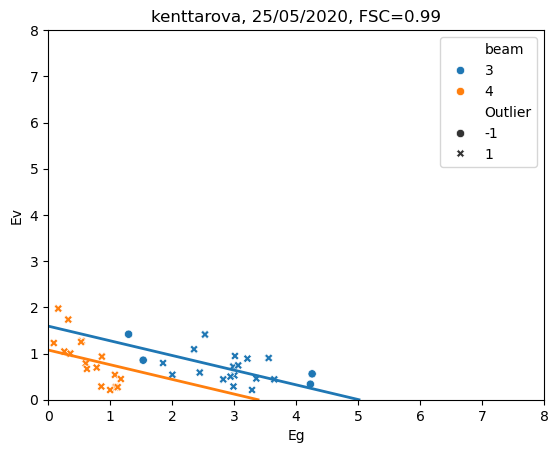

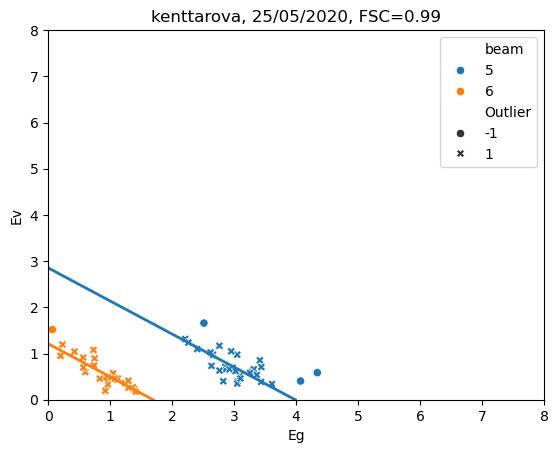

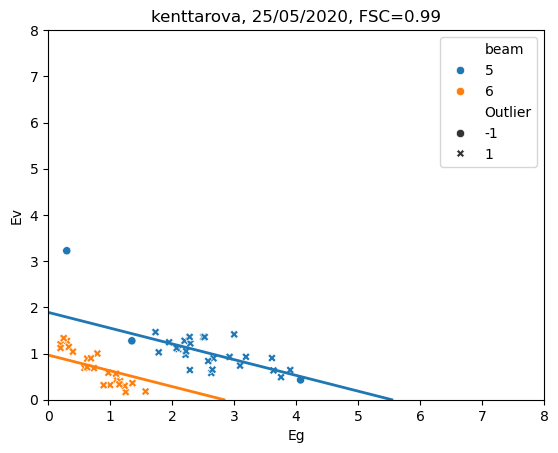

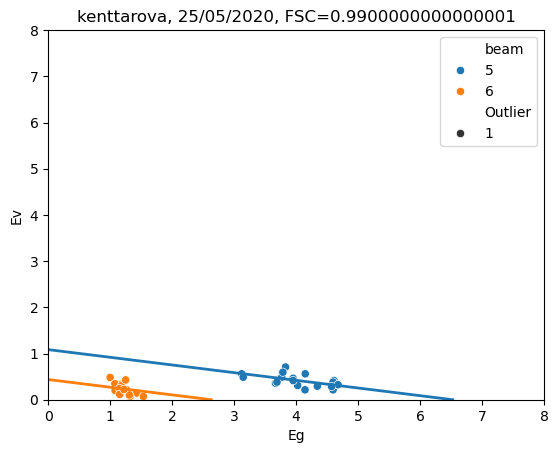

In [19]:
from scripts.parallel_blocks_WIP import *
    
# misclassified.columns
for idx, row in frac_data.sort_values('FSC').iterrows():
    plt.figure()
    plt.title(f"{row['camera']}, {row['date']}, FSC={row['FSC']}")
    
    test_plot = df[(df['camera'] == row['camera']) &
                   (df['date'] == row['date']) &
                   (df['lon'] == row['lon']) &
                   (df['lat'] == row['lat'])].copy()

    params, _, test = df_odr(test_plot, outlier_removal=10,w=[1, 0.25])

    # print(test)

    # Get sorted unique beams (hue order used by seaborn)
    beam_order = sorted(test['beam'].unique())

    # Create mapping from beam label to tab10 color
    tab10 = cm.get_cmap('tab10')
    color_map = {beam: tab10(i) for i, beam in enumerate(beam_order)}

    # Plot with fixed hue order and palette
    sns.scatterplot(data=test, x='Eg', y='Ev', hue='beam', style='Outlier',
                    hue_order=beam_order, palette=color_map)

    # Plot ODR lines in matching colors
    for b, beam in zip(params[1:], beam_order):
        plt.plot([0, -b / params[0]], [b, 0], color=color_map[beam], linewidth=2)

    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.legend()
    plt.show()

    # break